# Graph Datasets

In [1]:
import numpy as np
from datasets.random_graphs import ErdosRenyiDataset

In [2]:
rg = ErdosRenyiDataset(
    num_nodes=7,
    num_samples=500,
    er_prob=0.5,
    train_split=0.8
)


Erdos-Renyi Dataset (k=7, p=0.5): 500 graphs
Train count: 400
Test count: 100


In [3]:
train_ds, test_ds = rg.get_train_data(), rg.get_test_data()
print(f"Train dataset size: {len(train_ds[0])}")
print(f"Test dataset size: {len(test_ds[0])}")

Train dataset size: 400
Test dataset size: 100


In [4]:
print(f"Train dataset: {train_ds[0][0]}")

Train dataset: [0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.]


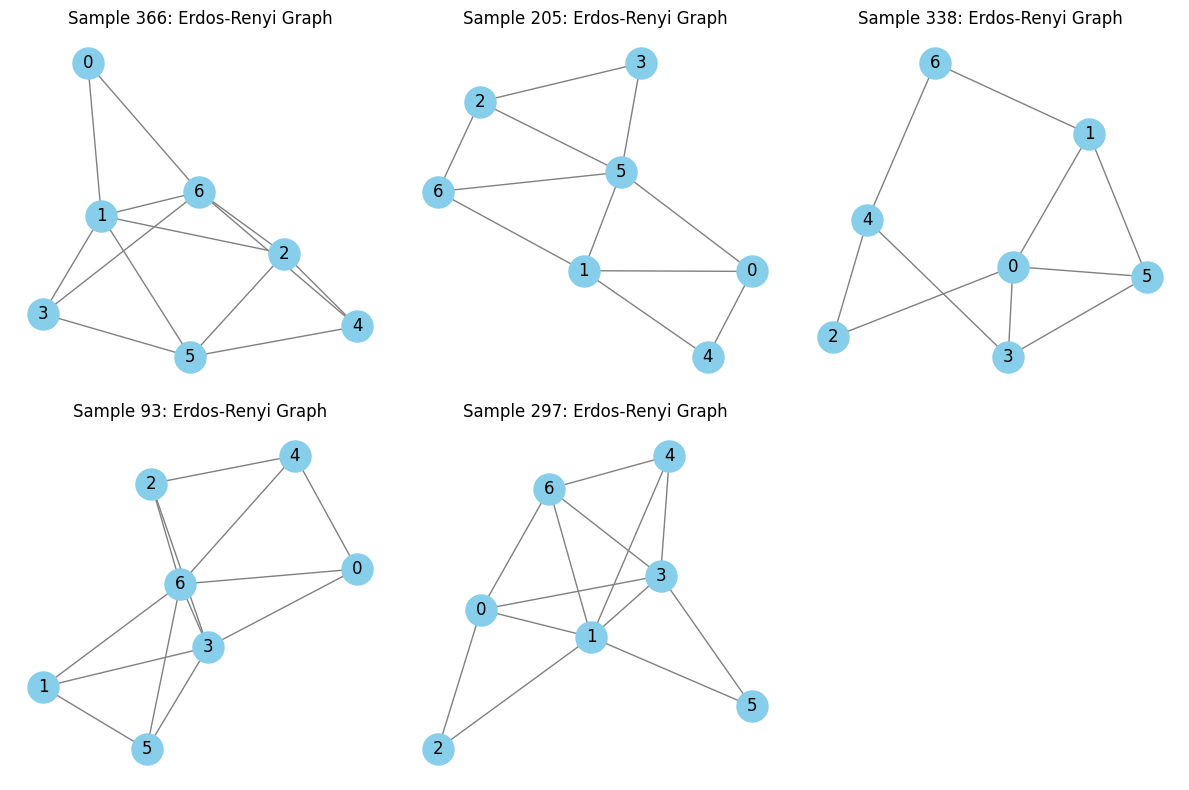

In [5]:
rg.plot_random_samples()

In [6]:
from datasets.bipartites import BipartiteGraphDataset 
bipartite_ds = BipartiteGraphDataset(
    num_samples = 500,
    num_vertices = 14,
    ratio_bipartite = 0.8,
    edge_prob = 0.2,
    ensure_connected = True,
    seed = 42,
)
print(f"Bipartite dataset size: {len(bipartite_ds[0])}")
print(f"Bipartite dataset: {bipartite_ds[0][0]}")


Bipartite Dataset (k=14, p=0.2, connected=True):
Target samples: 500, Generated samples: 500
Bipartite: 400, Non-Bipartite: 100
Target Ratio (Bipartite): 0.800, Actual Ratio: 0.800
Bipartite dataset size: 2
Bipartite dataset: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


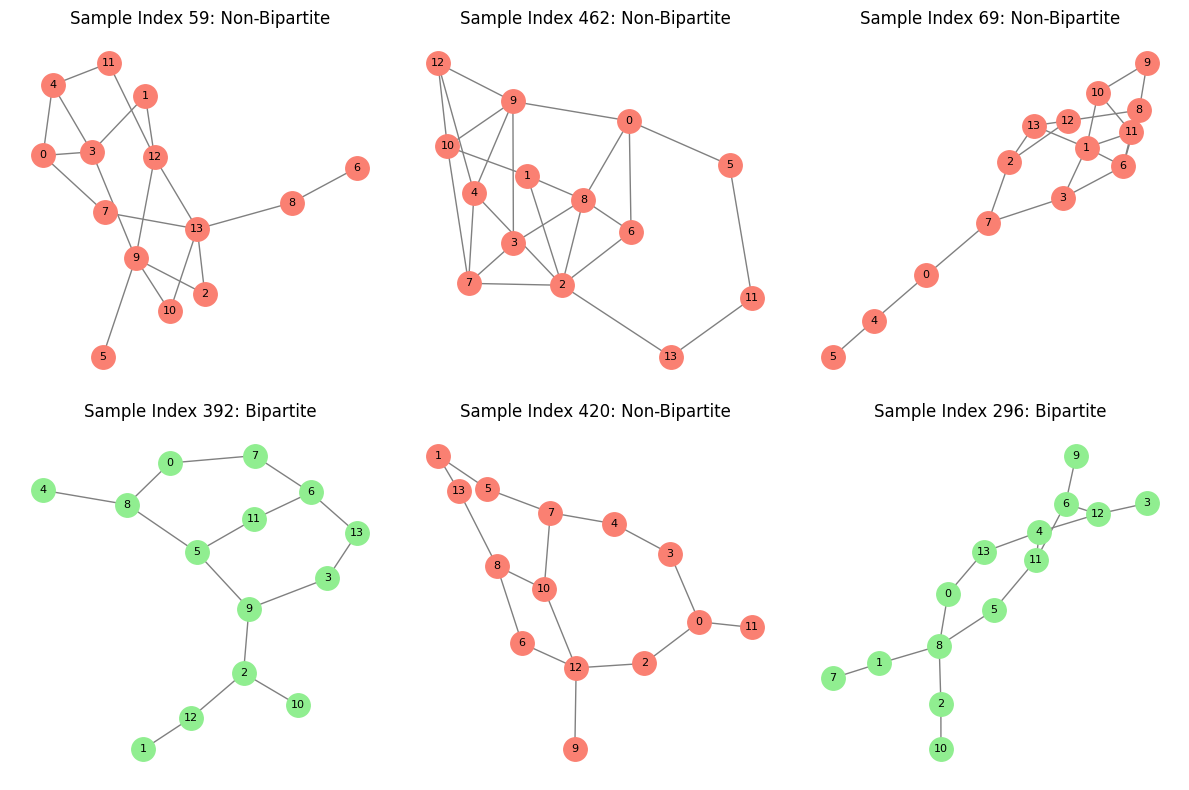

In [7]:
bipartite_ds.plot_random_samples()

# Bipartite BAE

In [8]:
# train_autoencoder.py
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import argparse
import os
from tqdm import tqdm # Import tqdm
import matplotlib.pyplot as plt # Import plotting libraries
import networkx as nx
import math # Import math

# --- Import Dataset & Utils ---
# This assumes src/dataset.py and src/utils.py exist as described previously
try:
    from datasets.utils import vec_to_adj
except ImportError as e:
    print(f"Error importing BipartiteGraphDataset or utils: {e}")
    print("Please ensure src/dataset.py and src/utils.py exist.")
    exit()


Using device: cpu
Using 10 vertices, expected input dimension: 45

Model Architecture:
BinaryAutoencoderGumbelDeep(
  (enc_fc1): Linear(in_features=45, out_features=128, bias=True)
  (enc_bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_fc2): Linear(in_features=128, out_features=64, bias=True)
  (enc_bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_fc3_logits): Linear(in_features=64, out_features=64, bias=True)
  (dropout_enc): Dropout(p=0.3, inplace=False)
  (dec_fc1): Linear(in_features=32, out_features=64, bias=True)
  (dec_bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_fc2): Linear(in_features=64, out_features=128, bias=True)
  (dec_bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_fc3_output): Linear(in_features=128, out_features=45, bias=True)
  (dropout_dec): Dropout(p=0.3, inplace=False)
)
Total traina

Epoch [1/1000] Average Loss: 1.0026


Epoch [2/1000] Average Loss: 0.8556


Epoch [3/1000] Average Loss: 0.7859


Epoch [4/1000] Average Loss: 0.7474


Epoch [5/1000] Average Loss: 0.7193


Epoch [6/1000] Average Loss: 0.6993


Epoch [7/1000] Average Loss: 0.6849


Epoch [8/1000] Average Loss: 0.6697


Epoch [9/1000] Average Loss: 0.6581


Epoch [10/1000] Average Loss: 0.6487


Epoch [11/1000] Average Loss: 0.6385


Epoch [12/1000] Average Loss: 0.6312


Epoch [13/1000] Average Loss: 0.6257


Epoch [14/1000] Average Loss: 0.6200


Epoch [15/1000] Average Loss: 0.6139


Epoch [16/1000] Average Loss: 0.6086


Epoch [17/1000] Average Loss: 0.6042


Epoch [18/1000] Average Loss: 0.6007


Epoch [19/1000] Average Loss: 0.5972


Epoch [20/1000] Average Loss: 0.5932


Epoch [21/1000] Average Loss: 0.5879


Epoch [22/1000] Average Loss: 0.5861


Epoch [23/1000] Average Loss: 0.5815


Epoch [24/1000] Average Loss: 0.5775


Epoch [25/1000] Average Loss: 0.5753


Epoch [26/1000] Average Loss: 0.5728


Epoch [27/1000] Average Loss: 0.5713


Epoch [28/1000] Average Loss: 0.5678


Epoch [29/1000] Average Loss: 0.5650


Epoch [30/1000] Average Loss: 0.5629


Epoch [31/1000] Average Loss: 0.5621


Epoch [32/1000] Average Loss: 0.5595


Epoch [33/1000] Average Loss: 0.5573


Epoch [34/1000] Average Loss: 0.5544


Epoch [35/1000] Average Loss: 0.5543


Epoch [36/1000] Average Loss: 0.5521


Epoch [37/1000] Average Loss: 0.5502


Epoch [38/1000] Average Loss: 0.5482


Epoch [39/1000] Average Loss: 0.5487


Epoch [40/1000] Average Loss: 0.5467


Epoch [41/1000] Average Loss: 0.5475


Epoch [42/1000] Average Loss: 0.5443


Epoch [43/1000] Average Loss: 0.5441


Epoch [44/1000] Average Loss: 0.5422


Epoch [45/1000] Average Loss: 0.5382


Epoch [46/1000] Average Loss: 0.5394


Epoch [47/1000] Average Loss: 0.5381


Epoch [48/1000] Average Loss: 0.5377


Epoch [49/1000] Average Loss: 0.5362


Epoch [50/1000] Average Loss: 0.5336


Epoch [51/1000] Average Loss: 0.5340


Epoch [52/1000] Average Loss: 0.5309


Epoch [53/1000] Average Loss: 0.5299


Epoch [54/1000] Average Loss: 0.5292


Epoch [55/1000] Average Loss: 0.5304


Epoch [56/1000] Average Loss: 0.5305


Epoch [57/1000] Average Loss: 0.5273


Epoch [58/1000] Average Loss: 0.5263


Epoch [59/1000] Average Loss: 0.5263


Epoch [60/1000] Average Loss: 0.5267


Epoch [61/1000] Average Loss: 0.5245


Epoch [62/1000] Average Loss: 0.5244


Epoch [63/1000] Average Loss: 0.5230


Epoch [64/1000] Average Loss: 0.5222


Epoch [65/1000] Average Loss: 0.5197


Epoch [66/1000] Average Loss: 0.5190


Epoch [67/1000] Average Loss: 0.5223


Epoch [68/1000] Average Loss: 0.5204


Epoch [69/1000] Average Loss: 0.5185


Epoch [70/1000] Average Loss: 0.5194


Epoch [71/1000] Average Loss: 0.5174


Epoch [72/1000] Average Loss: 0.5193


Epoch [73/1000] Average Loss: 0.5165


Epoch [74/1000] Average Loss: 0.5165


Epoch [75/1000] Average Loss: 0.5153


Epoch [76/1000] Average Loss: 0.5129


Epoch [77/1000] Average Loss: 0.5129


Epoch [78/1000] Average Loss: 0.5113


Epoch [79/1000] Average Loss: 0.5130


Epoch [80/1000] Average Loss: 0.5114


Epoch [81/1000] Average Loss: 0.5120


Epoch [82/1000] Average Loss: 0.5122


Epoch [83/1000] Average Loss: 0.5105


Epoch [84/1000] Average Loss: 0.5075


Epoch [85/1000] Average Loss: 0.5088


Epoch [86/1000] Average Loss: 0.5101


Epoch [87/1000] Average Loss: 0.5068


Epoch [88/1000] Average Loss: 0.5079


Epoch [89/1000] Average Loss: 0.5053


Epoch [90/1000] Average Loss: 0.5062


Epoch [91/1000] Average Loss: 0.5062


Epoch [92/1000] Average Loss: 0.5046


Epoch [93/1000] Average Loss: 0.5049


Epoch [94/1000] Average Loss: 0.5056


Epoch [95/1000] Average Loss: 0.5028


Epoch [96/1000] Average Loss: 0.5022


Epoch [97/1000] Average Loss: 0.5011


Epoch [98/1000] Average Loss: 0.5011


Epoch [99/1000] Average Loss: 0.5011


Epoch [100/1000] Average Loss: 0.5027


Epoch [101/1000] Average Loss: 0.5014


Epoch [102/1000] Average Loss: 0.5006


Epoch [103/1000] Average Loss: 0.5019


Epoch [104/1000] Average Loss: 0.4994


Epoch [105/1000] Average Loss: 0.4963


Epoch [106/1000] Average Loss: 0.4973


Epoch [107/1000] Average Loss: 0.4991


Epoch [108/1000] Average Loss: 0.4969


Epoch [109/1000] Average Loss: 0.4951


Epoch [110/1000] Average Loss: 0.4948


Epoch [111/1000] Average Loss: 0.4950


Epoch [112/1000] Average Loss: 0.4924


Epoch [113/1000] Average Loss: 0.4936


Epoch [114/1000] Average Loss: 0.4940


Epoch [115/1000] Average Loss: 0.4914


Epoch [116/1000] Average Loss: 0.4932


Epoch [117/1000] Average Loss: 0.4911


Epoch [118/1000] Average Loss: 0.4907


Epoch [119/1000] Average Loss: 0.4920


Epoch [120/1000] Average Loss: 0.4907


Epoch [121/1000] Average Loss: 0.4893


Epoch [122/1000] Average Loss: 0.4901


Epoch [123/1000] Average Loss: 0.4869


Epoch [124/1000] Average Loss: 0.4878


Epoch [125/1000] Average Loss: 0.4876


Epoch [126/1000] Average Loss: 0.4887


Epoch [127/1000] Average Loss: 0.4889


Epoch [128/1000] Average Loss: 0.4871


Epoch [129/1000] Average Loss: 0.4863


Epoch [130/1000] Average Loss: 0.4857


Epoch [131/1000] Average Loss: 0.4843


Epoch [132/1000] Average Loss: 0.4843


Epoch [133/1000] Average Loss: 0.4811


Epoch [134/1000] Average Loss: 0.4823


Epoch [135/1000] Average Loss: 0.4845


Epoch [136/1000] Average Loss: 0.4840


Epoch [137/1000] Average Loss: 0.4806


Epoch [138/1000] Average Loss: 0.4795


Epoch [139/1000] Average Loss: 0.4809


Epoch [140/1000] Average Loss: 0.4810


Epoch [141/1000] Average Loss: 0.4803


Epoch [142/1000] Average Loss: 0.4806


Epoch [143/1000] Average Loss: 0.4778


Epoch [144/1000] Average Loss: 0.4787


Epoch [145/1000] Average Loss: 0.4791


Epoch [146/1000] Average Loss: 0.4782


Epoch [147/1000] Average Loss: 0.4775


Epoch [148/1000] Average Loss: 0.4762


Epoch [149/1000] Average Loss: 0.4756


Epoch [150/1000] Average Loss: 0.4758


Epoch [151/1000] Average Loss: 0.4733


Epoch [152/1000] Average Loss: 0.4748


Epoch [153/1000] Average Loss: 0.4747


Epoch [154/1000] Average Loss: 0.4768


Epoch [155/1000] Average Loss: 0.4727


Epoch [156/1000] Average Loss: 0.4742


Epoch [157/1000] Average Loss: 0.4733


Epoch [158/1000] Average Loss: 0.4735


Epoch [159/1000] Average Loss: 0.4747


Epoch [160/1000] Average Loss: 0.4733


Epoch [161/1000] Average Loss: 0.4725


Epoch [162/1000] Average Loss: 0.4717


Epoch [163/1000] Average Loss: 0.4701


Epoch [164/1000] Average Loss: 0.4711


Epoch [165/1000] Average Loss: 0.4691


Epoch [166/1000] Average Loss: 0.4689


Epoch [167/1000] Average Loss: 0.4688


Epoch [168/1000] Average Loss: 0.4717


Epoch [169/1000] Average Loss: 0.4706


Epoch [170/1000] Average Loss: 0.4702


Epoch [171/1000] Average Loss: 0.4694


Epoch [172/1000] Average Loss: 0.4680


Epoch [173/1000] Average Loss: 0.4688


Epoch [174/1000] Average Loss: 0.4705


Epoch [175/1000] Average Loss: 0.4682


Epoch [176/1000] Average Loss: 0.4659


Epoch [177/1000] Average Loss: 0.4664


Epoch [178/1000] Average Loss: 0.4675


Epoch [179/1000] Average Loss: 0.4685


Epoch [180/1000] Average Loss: 0.4662


Epoch [181/1000] Average Loss: 0.4675


Epoch [182/1000] Average Loss: 0.4633


Epoch [183/1000] Average Loss: 0.4649


Epoch [184/1000] Average Loss: 0.4671


Epoch [185/1000] Average Loss: 0.4641


Epoch [186/1000] Average Loss: 0.4651


Epoch [187/1000] Average Loss: 0.4658


Epoch [188/1000] Average Loss: 0.4653


Epoch [189/1000] Average Loss: 0.4645


Epoch [190/1000] Average Loss: 0.4666


Epoch [191/1000] Average Loss: 0.4607


Epoch [192/1000] Average Loss: 0.4660


Epoch [193/1000] Average Loss: 0.4637


Epoch [194/1000] Average Loss: 0.4625


Epoch [195/1000] Average Loss: 0.4646


Epoch [196/1000] Average Loss: 0.4617


Epoch [197/1000] Average Loss: 0.4638


Epoch [198/1000] Average Loss: 0.4624


Epoch [199/1000] Average Loss: 0.4607


Epoch [200/1000] Average Loss: 0.4633


Epoch [201/1000] Average Loss: 0.4613


Epoch [202/1000] Average Loss: 0.4621


Epoch [203/1000] Average Loss: 0.4620


Epoch [204/1000] Average Loss: 0.4607


Epoch [205/1000] Average Loss: 0.4607


Epoch [206/1000] Average Loss: 0.4612


Epoch [207/1000] Average Loss: 0.4623


Epoch [208/1000] Average Loss: 0.4621


Epoch [209/1000] Average Loss: 0.4598


Epoch [210/1000] Average Loss: 0.4601


Epoch [211/1000] Average Loss: 0.4592


Epoch [212/1000] Average Loss: 0.4650


Epoch [213/1000] Average Loss: 0.4580


Epoch [214/1000] Average Loss: 0.4606


Epoch [215/1000] Average Loss: 0.4584


Epoch [216/1000] Average Loss: 0.4591


Epoch [217/1000] Average Loss: 0.4584


Epoch [218/1000] Average Loss: 0.4594


Epoch [219/1000] Average Loss: 0.4596


Epoch [220/1000] Average Loss: 0.4629


Epoch [221/1000] Average Loss: 0.4595


Epoch [222/1000] Average Loss: 0.4571


Epoch [223/1000] Average Loss: 0.4602


Epoch [224/1000] Average Loss: 0.4571


Epoch [225/1000] Average Loss: 0.4585


Epoch [226/1000] Average Loss: 0.4600


Epoch [227/1000] Average Loss: 0.4616


Epoch [228/1000] Average Loss: 0.4579


Epoch [229/1000] Average Loss: 0.4565


Epoch [230/1000] Average Loss: 0.4617


Epoch [231/1000] Average Loss: 0.4582


Epoch [232/1000] Average Loss: 0.4586


Epoch [233/1000] Average Loss: 0.4553


Epoch [234/1000] Average Loss: 0.4553


Epoch [235/1000] Average Loss: 0.4613


Epoch [236/1000] Average Loss: 0.4578


Epoch [237/1000] Average Loss: 0.4550


Epoch [238/1000] Average Loss: 0.4573


Epoch [239/1000] Average Loss: 0.4555


Epoch [240/1000] Average Loss: 0.4551


Epoch [241/1000] Average Loss: 0.4556


Epoch [242/1000] Average Loss: 0.4548


Epoch [243/1000] Average Loss: 0.4569


Epoch [244/1000] Average Loss: 0.4563


Epoch [245/1000] Average Loss: 0.4543


Epoch [246/1000] Average Loss: 0.4543


Epoch [247/1000] Average Loss: 0.4557


Epoch [248/1000] Average Loss: 0.4550


Epoch [249/1000] Average Loss: 0.4560


Epoch [250/1000] Average Loss: 0.4570


Epoch [251/1000] Average Loss: 0.4575


Epoch [252/1000] Average Loss: 0.4579


Epoch [253/1000] Average Loss: 0.4550


Epoch [254/1000] Average Loss: 0.4537


Epoch [255/1000] Average Loss: 0.4558


Epoch [256/1000] Average Loss: 0.4588


Epoch [257/1000] Average Loss: 0.4568


Epoch [258/1000] Average Loss: 0.4529


Epoch [259/1000] Average Loss: 0.4531


Epoch [260/1000] Average Loss: 0.4536


Epoch [261/1000] Average Loss: 0.4533


Epoch [262/1000] Average Loss: 0.4569


Epoch [263/1000] Average Loss: 0.4555


Epoch [264/1000] Average Loss: 0.4570


Epoch [265/1000] Average Loss: 0.4565


Epoch [266/1000] Average Loss: 0.4575


Epoch [267/1000] Average Loss: 0.4513


Epoch [268/1000] Average Loss: 0.4540


Epoch [269/1000] Average Loss: 0.4529


Epoch [270/1000] Average Loss: 0.4528


Epoch [271/1000] Average Loss: 0.4533


Epoch [272/1000] Average Loss: 0.4515


Epoch [273/1000] Average Loss: 0.4503


Epoch [274/1000] Average Loss: 0.4513


Epoch [275/1000] Average Loss: 0.4510


Epoch [276/1000] Average Loss: 0.4505


Epoch [277/1000] Average Loss: 0.4491


Epoch [278/1000] Average Loss: 0.4505


Epoch [279/1000] Average Loss: 0.4524


Epoch [280/1000] Average Loss: 0.4554


Epoch [281/1000] Average Loss: 0.4499


Epoch [282/1000] Average Loss: 0.4522


Epoch [283/1000] Average Loss: 0.4517


Epoch [284/1000] Average Loss: 0.4513


Epoch [285/1000] Average Loss: 0.4490


Epoch [286/1000] Average Loss: 0.4503


Epoch [287/1000] Average Loss: 0.4496


Epoch [288/1000] Average Loss: 0.4483


Epoch [289/1000] Average Loss: 0.4488


Epoch [290/1000] Average Loss: 0.4503


Epoch [291/1000] Average Loss: 0.4486


Epoch [292/1000] Average Loss: 0.4493


Epoch [293/1000] Average Loss: 0.4496


Epoch [294/1000] Average Loss: 0.4481


Epoch [295/1000] Average Loss: 0.4494


Epoch [296/1000] Average Loss: 0.4497


Epoch [297/1000] Average Loss: 0.4474


Epoch [298/1000] Average Loss: 0.4478


Epoch [299/1000] Average Loss: 0.4505


Epoch [300/1000] Average Loss: 0.4459


Epoch [301/1000] Average Loss: 0.4488


Epoch [302/1000] Average Loss: 0.4483


Epoch [303/1000] Average Loss: 0.4478


Epoch [304/1000] Average Loss: 0.4465


Epoch [305/1000] Average Loss: 0.4483


Epoch [306/1000] Average Loss: 0.4491


Epoch [307/1000] Average Loss: 0.4500


Epoch [308/1000] Average Loss: 0.4487


Epoch [309/1000] Average Loss: 0.4470


Epoch [310/1000] Average Loss: 0.4463


Epoch [311/1000] Average Loss: 0.4454


Epoch [312/1000] Average Loss: 0.4452


Epoch [313/1000] Average Loss: 0.4473


Epoch [314/1000] Average Loss: 0.4432


Epoch [315/1000] Average Loss: 0.4473


Epoch [316/1000] Average Loss: 0.4481


Epoch [317/1000] Average Loss: 0.4478


Epoch [318/1000] Average Loss: 0.4424


Epoch [319/1000] Average Loss: 0.4468


Epoch [320/1000] Average Loss: 0.4473


Epoch [321/1000] Average Loss: 0.4434


Epoch [322/1000] Average Loss: 0.4463


Epoch [323/1000] Average Loss: 0.4448


Epoch [324/1000] Average Loss: 0.4413


Epoch [325/1000] Average Loss: 0.4442


Epoch [326/1000] Average Loss: 0.4431


Epoch [327/1000] Average Loss: 0.4449


Epoch [328/1000] Average Loss: 0.4443


Epoch [329/1000] Average Loss: 0.4450


Epoch [330/1000] Average Loss: 0.4453


Epoch [331/1000] Average Loss: 0.4431


Epoch [332/1000] Average Loss: 0.4467


Epoch [333/1000] Average Loss: 0.4423


Epoch [334/1000] Average Loss: 0.4410


Epoch [335/1000] Average Loss: 0.4463


Epoch [336/1000] Average Loss: 0.4442


Epoch [337/1000] Average Loss: 0.4429


Epoch [338/1000] Average Loss: 0.4432


Epoch [339/1000] Average Loss: 0.4429


Epoch [340/1000] Average Loss: 0.4431


Epoch [341/1000] Average Loss: 0.4462


Epoch [342/1000] Average Loss: 0.4397


Epoch [343/1000] Average Loss: 0.4406


Epoch [344/1000] Average Loss: 0.4431


Epoch [345/1000] Average Loss: 0.4406


Epoch [346/1000] Average Loss: 0.4407


Epoch [347/1000] Average Loss: 0.4443


Epoch [348/1000] Average Loss: 0.4416


Epoch [349/1000] Average Loss: 0.4438


Epoch [350/1000] Average Loss: 0.4424


Epoch [351/1000] Average Loss: 0.4459


Epoch [352/1000] Average Loss: 0.4407


Epoch [353/1000] Average Loss: 0.4412


Epoch [354/1000] Average Loss: 0.4419


Epoch [355/1000] Average Loss: 0.4393


Epoch [356/1000] Average Loss: 0.4404


Epoch [357/1000] Average Loss: 0.4388


Epoch [358/1000] Average Loss: 0.4416


Epoch [359/1000] Average Loss: 0.4413


Epoch [360/1000] Average Loss: 0.4392


Epoch [361/1000] Average Loss: 0.4380


Epoch [362/1000] Average Loss: 0.4396


Epoch [363/1000] Average Loss: 0.4380


Epoch [364/1000] Average Loss: 0.4379


Epoch [365/1000] Average Loss: 0.4363


Epoch [366/1000] Average Loss: 0.4392


Epoch [367/1000] Average Loss: 0.4373


Epoch [368/1000] Average Loss: 0.4382


Epoch [369/1000] Average Loss: 0.4386


Epoch [370/1000] Average Loss: 0.4388


Epoch [371/1000] Average Loss: 0.4401


Epoch [372/1000] Average Loss: 0.4365


Epoch [373/1000] Average Loss: 0.4387


Epoch [374/1000] Average Loss: 0.4403


Epoch [375/1000] Average Loss: 0.4392


Epoch [376/1000] Average Loss: 0.4368


Epoch [377/1000] Average Loss: 0.4367


Epoch [378/1000] Average Loss: 0.4347


Epoch [379/1000] Average Loss: 0.4379


Epoch [380/1000] Average Loss: 0.4350


Epoch [381/1000] Average Loss: 0.4393


Epoch [382/1000] Average Loss: 0.4363


Epoch [383/1000] Average Loss: 0.4403


Epoch [384/1000] Average Loss: 0.4346


Epoch [385/1000] Average Loss: 0.4347


Epoch [386/1000] Average Loss: 0.4342


Epoch [387/1000] Average Loss: 0.4363


Epoch [388/1000] Average Loss: 0.4402


Epoch [389/1000] Average Loss: 0.4349


Epoch [390/1000] Average Loss: 0.4371


Epoch [391/1000] Average Loss: 0.4348


Epoch [392/1000] Average Loss: 0.4374


Epoch [393/1000] Average Loss: 0.4349


Epoch [394/1000] Average Loss: 0.4358


Epoch [395/1000] Average Loss: 0.4358


Epoch [396/1000] Average Loss: 0.4368


Epoch [397/1000] Average Loss: 0.4352


Epoch [398/1000] Average Loss: 0.4343


Epoch [399/1000] Average Loss: 0.4352


Epoch [400/1000] Average Loss: 0.4331


Epoch [401/1000] Average Loss: 0.4337


Epoch [402/1000] Average Loss: 0.4366


Epoch [403/1000] Average Loss: 0.4331


Epoch [404/1000] Average Loss: 0.4377


Epoch [405/1000] Average Loss: 0.4333


Epoch [406/1000] Average Loss: 0.4345


Epoch [407/1000] Average Loss: 0.4343


Epoch [408/1000] Average Loss: 0.4356


Epoch [409/1000] Average Loss: 0.4317


Epoch [410/1000] Average Loss: 0.4322


Epoch [411/1000] Average Loss: 0.4318


Epoch [412/1000] Average Loss: 0.4307


Epoch [413/1000] Average Loss: 0.4312


Epoch [414/1000] Average Loss: 0.4337


Epoch [415/1000] Average Loss: 0.4317


Epoch [416/1000] Average Loss: 0.4332


Epoch [417/1000] Average Loss: 0.4342


Epoch [418/1000] Average Loss: 0.4331


Epoch [419/1000] Average Loss: 0.4337


Epoch [420/1000] Average Loss: 0.4345


Epoch [421/1000] Average Loss: 0.4336


Epoch [422/1000] Average Loss: 0.4336


Epoch [423/1000] Average Loss: 0.4333


Epoch [424/1000] Average Loss: 0.4326


Epoch [425/1000] Average Loss: 0.4333


Epoch [426/1000] Average Loss: 0.4336


Epoch [427/1000] Average Loss: 0.4306


Epoch [428/1000] Average Loss: 0.4322


Epoch [429/1000] Average Loss: 0.4342


Epoch [430/1000] Average Loss: 0.4344


Epoch [431/1000] Average Loss: 0.4304


Epoch [432/1000] Average Loss: 0.4373


Epoch [433/1000] Average Loss: 0.4359


Epoch [434/1000] Average Loss: 0.4334


Epoch [435/1000] Average Loss: 0.4348


Epoch [436/1000] Average Loss: 0.4305


Epoch [437/1000] Average Loss: 0.4304


Epoch [438/1000] Average Loss: 0.4297


Epoch [439/1000] Average Loss: 0.4323


Epoch [440/1000] Average Loss: 0.4307


Epoch [441/1000] Average Loss: 0.4295


Epoch [442/1000] Average Loss: 0.4343


Epoch [443/1000] Average Loss: 0.4291


Epoch [444/1000] Average Loss: 0.4308


Epoch [445/1000] Average Loss: 0.4293


Epoch [446/1000] Average Loss: 0.4343


Epoch [447/1000] Average Loss: 0.4299


Epoch [448/1000] Average Loss: 0.4295


Epoch [449/1000] Average Loss: 0.4282


Epoch [450/1000] Average Loss: 0.4308


Epoch [451/1000] Average Loss: 0.4287


Epoch [452/1000] Average Loss: 0.4293


Epoch [453/1000] Average Loss: 0.4297


Epoch [454/1000] Average Loss: 0.4327


Epoch [455/1000] Average Loss: 0.4286


Epoch [456/1000] Average Loss: 0.4310


Epoch [457/1000] Average Loss: 0.4289


Epoch [458/1000] Average Loss: 0.4319


Epoch [459/1000] Average Loss: 0.4310


Epoch [460/1000] Average Loss: 0.4286


Epoch [461/1000] Average Loss: 0.4274


Epoch [462/1000] Average Loss: 0.4296


Epoch [463/1000] Average Loss: 0.4270


Epoch [464/1000] Average Loss: 0.4287


Epoch [465/1000] Average Loss: 0.4301


Epoch [466/1000] Average Loss: 0.4286


Epoch [467/1000] Average Loss: 0.4347


Epoch [468/1000] Average Loss: 0.4272


Epoch [469/1000] Average Loss: 0.4305


Epoch [470/1000] Average Loss: 0.4309


Epoch [471/1000] Average Loss: 0.4294


Epoch [472/1000] Average Loss: 0.4315


Epoch [473/1000] Average Loss: 0.4317


Epoch [474/1000] Average Loss: 0.4262


Epoch [475/1000] Average Loss: 0.4298


Epoch [476/1000] Average Loss: 0.4267


Epoch [477/1000] Average Loss: 0.4293


Epoch [478/1000] Average Loss: 0.4262


Epoch [479/1000] Average Loss: 0.4280


Epoch [480/1000] Average Loss: 0.4274


Epoch [481/1000] Average Loss: 0.4288


Epoch [482/1000] Average Loss: 0.4308


Epoch [483/1000] Average Loss: 0.4264


Epoch [484/1000] Average Loss: 0.4292


Epoch [485/1000] Average Loss: 0.4313


Epoch [486/1000] Average Loss: 0.4265


Epoch [487/1000] Average Loss: 0.4298


Epoch [488/1000] Average Loss: 0.4261


Epoch [489/1000] Average Loss: 0.4306


Epoch [490/1000] Average Loss: 0.4317


Epoch [491/1000] Average Loss: 0.4268


Epoch [492/1000] Average Loss: 0.4268


Epoch [493/1000] Average Loss: 0.4274


Epoch [494/1000] Average Loss: 0.4291


Epoch [495/1000] Average Loss: 0.4275


Epoch [496/1000] Average Loss: 0.4281


Epoch [497/1000] Average Loss: 0.4254


Epoch [498/1000] Average Loss: 0.4267


Epoch [499/1000] Average Loss: 0.4278


Epoch [500/1000] Average Loss: 0.4255


Epoch [501/1000] Average Loss: 0.4268


Epoch [502/1000] Average Loss: 0.4270


Epoch [503/1000] Average Loss: 0.4263


Epoch [504/1000] Average Loss: 0.4268


Epoch [505/1000] Average Loss: 0.4287


Epoch [506/1000] Average Loss: 0.4270


Epoch [507/1000] Average Loss: 0.4260


Epoch [508/1000] Average Loss: 0.4266


Epoch [509/1000] Average Loss: 0.4281


Epoch [510/1000] Average Loss: 0.4267


Epoch [511/1000] Average Loss: 0.4253


Epoch [512/1000] Average Loss: 0.4285


Epoch [513/1000] Average Loss: 0.4260


Epoch [514/1000] Average Loss: 0.4267


Epoch [515/1000] Average Loss: 0.4276


Epoch [516/1000] Average Loss: 0.4274


Epoch [517/1000] Average Loss: 0.4243


Epoch [518/1000] Average Loss: 0.4235


Epoch [519/1000] Average Loss: 0.4244


Epoch [520/1000] Average Loss: 0.4238


Epoch [521/1000] Average Loss: 0.4245


Epoch [522/1000] Average Loss: 0.4269


Epoch [523/1000] Average Loss: 0.4253


Epoch [524/1000] Average Loss: 0.4237


Epoch [525/1000] Average Loss: 0.4256


Epoch [526/1000] Average Loss: 0.4276


Epoch [527/1000] Average Loss: 0.4288


Epoch [528/1000] Average Loss: 0.4263


Epoch [529/1000] Average Loss: 0.4243


Epoch [530/1000] Average Loss: 0.4272


Epoch [531/1000] Average Loss: 0.4260


Epoch [532/1000] Average Loss: 0.4251


Epoch [533/1000] Average Loss: 0.4234


Epoch [534/1000] Average Loss: 0.4256


Epoch [535/1000] Average Loss: 0.4255


Epoch [536/1000] Average Loss: 0.4233


Epoch [537/1000] Average Loss: 0.4260


Epoch [538/1000] Average Loss: 0.4272


Epoch [539/1000] Average Loss: 0.4259


Epoch [540/1000] Average Loss: 0.4241


Epoch [541/1000] Average Loss: 0.4245


Epoch [542/1000] Average Loss: 0.4222


Epoch [543/1000] Average Loss: 0.4261


Epoch [544/1000] Average Loss: 0.4252


Epoch [545/1000] Average Loss: 0.4255


Epoch [546/1000] Average Loss: 0.4243


Epoch [547/1000] Average Loss: 0.4250


Epoch [548/1000] Average Loss: 0.4240


Epoch [549/1000] Average Loss: 0.4232


Epoch [550/1000] Average Loss: 0.4241


Epoch [551/1000] Average Loss: 0.4228


Epoch [552/1000] Average Loss: 0.4256


Epoch [553/1000] Average Loss: 0.4261


Epoch [554/1000] Average Loss: 0.4250


Epoch [555/1000] Average Loss: 0.4222


Epoch [556/1000] Average Loss: 0.4241


Epoch [557/1000] Average Loss: 0.4244


Epoch [558/1000] Average Loss: 0.4240


Epoch [559/1000] Average Loss: 0.4250


Epoch [560/1000] Average Loss: 0.4242


Epoch [561/1000] Average Loss: 0.4235


Epoch [562/1000] Average Loss: 0.4218


Epoch [563/1000] Average Loss: 0.4209


Epoch [564/1000] Average Loss: 0.4270


Epoch [565/1000] Average Loss: 0.4235


Epoch [566/1000] Average Loss: 0.4248


Epoch [567/1000] Average Loss: 0.4261


Epoch [568/1000] Average Loss: 0.4207


Epoch [569/1000] Average Loss: 0.4255


Epoch [570/1000] Average Loss: 0.4242


Epoch [571/1000] Average Loss: 0.4233


Epoch [572/1000] Average Loss: 0.4249


Epoch [573/1000] Average Loss: 0.4215


Epoch [574/1000] Average Loss: 0.4250


Epoch [575/1000] Average Loss: 0.4232


Epoch [576/1000] Average Loss: 0.4225


Epoch [577/1000] Average Loss: 0.4249


Epoch [578/1000] Average Loss: 0.4272


Epoch [579/1000] Average Loss: 0.4244


Epoch [580/1000] Average Loss: 0.4254


Epoch [581/1000] Average Loss: 0.4227


Epoch [582/1000] Average Loss: 0.4231


Epoch [583/1000] Average Loss: 0.4223


Epoch [584/1000] Average Loss: 0.4235


Epoch [585/1000] Average Loss: 0.4211


Epoch [586/1000] Average Loss: 0.4231


Epoch [587/1000] Average Loss: 0.4205


Epoch [588/1000] Average Loss: 0.4297


Epoch [589/1000] Average Loss: 0.4234


Epoch [590/1000] Average Loss: 0.4273


Epoch [591/1000] Average Loss: 0.4232


Epoch [592/1000] Average Loss: 0.4229


Epoch [593/1000] Average Loss: 0.4271


Epoch [594/1000] Average Loss: 0.4232


Epoch [595/1000] Average Loss: 0.4280


Epoch [596/1000] Average Loss: 0.4227


Epoch [597/1000] Average Loss: 0.4234


Epoch [598/1000] Average Loss: 0.4238


Epoch [599/1000] Average Loss: 0.4232


Epoch [600/1000] Average Loss: 0.4270


Epoch [601/1000] Average Loss: 0.4209


Epoch [602/1000] Average Loss: 0.4212


Epoch [603/1000] Average Loss: 0.4242


Epoch [604/1000] Average Loss: 0.4200


Epoch [605/1000] Average Loss: 0.4212


Epoch [606/1000] Average Loss: 0.4212


Epoch [607/1000] Average Loss: 0.4222


Epoch [608/1000] Average Loss: 0.4222


Epoch [609/1000] Average Loss: 0.4209


Epoch [610/1000] Average Loss: 0.4227


Epoch [611/1000] Average Loss: 0.4240


Epoch [612/1000] Average Loss: 0.4195


Epoch [613/1000] Average Loss: 0.4236


Epoch [614/1000] Average Loss: 0.4221


Epoch [615/1000] Average Loss: 0.4229


Epoch [616/1000] Average Loss: 0.4233


Epoch [617/1000] Average Loss: 0.4232


Epoch [618/1000] Average Loss: 0.4236


Epoch [619/1000] Average Loss: 0.4219


Epoch [620/1000] Average Loss: 0.4265


Epoch [621/1000] Average Loss: 0.4200


Epoch [622/1000] Average Loss: 0.4235


Epoch [623/1000] Average Loss: 0.4201


Epoch [624/1000] Average Loss: 0.4220


Epoch [625/1000] Average Loss: 0.4241


Epoch [626/1000] Average Loss: 0.4204


Epoch [627/1000] Average Loss: 0.4197


Epoch [628/1000] Average Loss: 0.4223


Epoch [629/1000] Average Loss: 0.4223


Epoch [630/1000] Average Loss: 0.4231


Epoch [631/1000] Average Loss: 0.4204


Epoch [632/1000] Average Loss: 0.4192


Epoch [633/1000] Average Loss: 0.4246


Epoch [634/1000] Average Loss: 0.4215


Epoch [635/1000] Average Loss: 0.4202


Epoch [636/1000] Average Loss: 0.4212


Epoch [637/1000] Average Loss: 0.4219


Epoch [638/1000] Average Loss: 0.4200


Epoch [639/1000] Average Loss: 0.4215


Epoch [640/1000] Average Loss: 0.4191


Epoch [641/1000] Average Loss: 0.4217


Epoch [642/1000] Average Loss: 0.4198


Epoch [643/1000] Average Loss: 0.4192


Epoch [644/1000] Average Loss: 0.4201


Epoch [645/1000] Average Loss: 0.4234


Epoch [646/1000] Average Loss: 0.4206


Epoch [647/1000] Average Loss: 0.4202


Epoch [648/1000] Average Loss: 0.4229


Epoch [649/1000] Average Loss: 0.4241


Epoch [650/1000] Average Loss: 0.4209


Epoch [651/1000] Average Loss: 0.4227


Epoch [652/1000] Average Loss: 0.4209


Epoch [653/1000] Average Loss: 0.4267


Epoch [654/1000] Average Loss: 0.4215


Epoch [655/1000] Average Loss: 0.4217


Epoch [656/1000] Average Loss: 0.4232


Epoch [657/1000] Average Loss: 0.4211


Epoch [658/1000] Average Loss: 0.4251


Epoch [659/1000] Average Loss: 0.4186


Epoch [660/1000] Average Loss: 0.4208


Epoch [661/1000] Average Loss: 0.4211


Epoch [662/1000] Average Loss: 0.4231


Epoch [663/1000] Average Loss: 0.4207


Epoch [664/1000] Average Loss: 0.4209


Epoch [665/1000] Average Loss: 0.4225


Epoch [666/1000] Average Loss: 0.4254


Epoch [667/1000] Average Loss: 0.4212


Epoch [668/1000] Average Loss: 0.4226


Epoch [669/1000] Average Loss: 0.4216


Epoch [670/1000] Average Loss: 0.4200


Epoch [671/1000] Average Loss: 0.4234


Epoch [672/1000] Average Loss: 0.4195


Epoch [673/1000] Average Loss: 0.4178


Epoch [674/1000] Average Loss: 0.4182


Epoch [675/1000] Average Loss: 0.4194


Epoch [676/1000] Average Loss: 0.4188


Epoch [677/1000] Average Loss: 0.4188


Epoch [678/1000] Average Loss: 0.4214


Epoch [679/1000] Average Loss: 0.4208


Epoch [680/1000] Average Loss: 0.4222


Epoch [681/1000] Average Loss: 0.4202


Epoch [682/1000] Average Loss: 0.4207


Epoch [683/1000] Average Loss: 0.4170


Epoch [684/1000] Average Loss: 0.4219


Epoch [685/1000] Average Loss: 0.4182


Epoch [686/1000] Average Loss: 0.4169


Epoch [687/1000] Average Loss: 0.4213


Epoch [688/1000] Average Loss: 0.4174


Epoch [689/1000] Average Loss: 0.4181


Epoch [690/1000] Average Loss: 0.4177


Epoch [691/1000] Average Loss: 0.4173


Epoch [692/1000] Average Loss: 0.4192


Epoch [693/1000] Average Loss: 0.4198


Epoch [694/1000] Average Loss: 0.4186


Epoch [695/1000] Average Loss: 0.4198


Epoch [696/1000] Average Loss: 0.4189


Epoch [697/1000] Average Loss: 0.4190


Epoch [698/1000] Average Loss: 0.4208


Epoch [699/1000] Average Loss: 0.4219


Epoch [700/1000] Average Loss: 0.4237


Epoch [701/1000] Average Loss: 0.4181


Epoch [702/1000] Average Loss: 0.4204


Epoch [703/1000] Average Loss: 0.4182


Epoch [704/1000] Average Loss: 0.4216


Epoch [705/1000] Average Loss: 0.4248


Epoch [706/1000] Average Loss: 0.4199


Epoch [707/1000] Average Loss: 0.4258


Epoch [708/1000] Average Loss: 0.4183


Epoch [709/1000] Average Loss: 0.4196


Epoch [710/1000] Average Loss: 0.4202


Epoch [711/1000] Average Loss: 0.4199


Epoch [712/1000] Average Loss: 0.4192


Epoch [713/1000] Average Loss: 0.4178


Epoch [714/1000] Average Loss: 0.4176


Epoch [715/1000] Average Loss: 0.4210


Epoch [716/1000] Average Loss: 0.4219


Epoch [717/1000] Average Loss: 0.4182


Epoch [718/1000] Average Loss: 0.4204


Epoch [719/1000] Average Loss: 0.4198


Epoch [720/1000] Average Loss: 0.4223


Epoch [721/1000] Average Loss: 0.4217


Epoch [722/1000] Average Loss: 0.4207


Epoch [723/1000] Average Loss: 0.4175


Epoch [724/1000] Average Loss: 0.4199


Epoch [725/1000] Average Loss: 0.4177


Epoch [726/1000] Average Loss: 0.4214


Epoch [727/1000] Average Loss: 0.4183


Epoch [728/1000] Average Loss: 0.4188


Epoch [729/1000] Average Loss: 0.4222


Epoch [730/1000] Average Loss: 0.4189


Epoch [731/1000] Average Loss: 0.4194


Epoch [732/1000] Average Loss: 0.4213


Epoch [733/1000] Average Loss: 0.4197


Epoch [734/1000] Average Loss: 0.4191


Epoch [735/1000] Average Loss: 0.4205


Epoch [736/1000] Average Loss: 0.4207


Epoch [737/1000] Average Loss: 0.4190


Epoch [738/1000] Average Loss: 0.4199


Epoch [739/1000] Average Loss: 0.4201


Epoch [740/1000] Average Loss: 0.4179


Epoch [741/1000] Average Loss: 0.4178


Epoch [742/1000] Average Loss: 0.4168


Epoch [743/1000] Average Loss: 0.4172


Epoch [744/1000] Average Loss: 0.4175


Epoch [745/1000] Average Loss: 0.4224


Epoch [746/1000] Average Loss: 0.4180


Epoch [747/1000] Average Loss: 0.4165


Epoch [748/1000] Average Loss: 0.4216


Epoch [749/1000] Average Loss: 0.4176


Epoch [750/1000] Average Loss: 0.4190


Epoch [751/1000] Average Loss: 0.4177


Epoch [752/1000] Average Loss: 0.4178


Epoch [753/1000] Average Loss: 0.4171


Epoch [754/1000] Average Loss: 0.4247


Epoch [755/1000] Average Loss: 0.4180


Epoch [756/1000] Average Loss: 0.4172


Epoch [757/1000] Average Loss: 0.4183


Epoch [758/1000] Average Loss: 0.4168


Epoch [759/1000] Average Loss: 0.4201


Epoch [760/1000] Average Loss: 0.4164


Epoch [761/1000] Average Loss: 0.4179


Epoch [762/1000] Average Loss: 0.4174


Epoch [763/1000] Average Loss: 0.4201


Epoch [764/1000] Average Loss: 0.4157


Epoch [765/1000] Average Loss: 0.4226


Epoch [766/1000] Average Loss: 0.4199


Epoch [767/1000] Average Loss: 0.4162


Epoch [768/1000] Average Loss: 0.4203


Epoch [769/1000] Average Loss: 0.4198


Epoch [770/1000] Average Loss: 0.4220


Epoch [771/1000] Average Loss: 0.4180


Epoch [772/1000] Average Loss: 0.4157


Epoch [773/1000] Average Loss: 0.4165


Epoch [774/1000] Average Loss: 0.4158


Epoch [775/1000] Average Loss: 0.4184


Epoch [776/1000] Average Loss: 0.4199


Epoch [777/1000] Average Loss: 0.4166


Epoch [778/1000] Average Loss: 0.4162


Epoch [779/1000] Average Loss: 0.4193


Epoch [780/1000] Average Loss: 0.4224


Epoch [781/1000] Average Loss: 0.4171


Epoch [782/1000] Average Loss: 0.4177


Epoch [783/1000] Average Loss: 0.4210


Epoch [784/1000] Average Loss: 0.4205


Epoch [785/1000] Average Loss: 0.4203


Epoch [786/1000] Average Loss: 0.4197


Epoch [787/1000] Average Loss: 0.4186


Epoch [788/1000] Average Loss: 0.4175


Epoch [789/1000] Average Loss: 0.4181


Epoch [790/1000] Average Loss: 0.4180


Epoch [791/1000] Average Loss: 0.4164


Epoch [792/1000] Average Loss: 0.4174


Epoch [793/1000] Average Loss: 0.4216


Epoch [794/1000] Average Loss: 0.4190


Epoch [795/1000] Average Loss: 0.4214


Epoch [796/1000] Average Loss: 0.4159


Epoch [797/1000] Average Loss: 0.4175


Epoch [798/1000] Average Loss: 0.4192


Epoch [799/1000] Average Loss: 0.4174


Epoch [800/1000] Average Loss: 0.4194


Epoch [801/1000] Average Loss: 0.4153


Epoch [802/1000] Average Loss: 0.4176


Epoch [803/1000] Average Loss: 0.4152


Epoch [804/1000] Average Loss: 0.4164


Epoch [805/1000] Average Loss: 0.4164


Epoch [806/1000] Average Loss: 0.4184


Epoch [807/1000] Average Loss: 0.4166


Epoch [808/1000] Average Loss: 0.4188


Epoch [809/1000] Average Loss: 0.4199


Epoch [810/1000] Average Loss: 0.4164


Epoch [811/1000] Average Loss: 0.4162


Epoch [812/1000] Average Loss: 0.4202


Epoch [813/1000] Average Loss: 0.4173


Epoch [814/1000] Average Loss: 0.4193


Epoch [815/1000] Average Loss: 0.4166


Epoch [816/1000] Average Loss: 0.4152


Epoch [817/1000] Average Loss: 0.4164


Epoch [818/1000] Average Loss: 0.4170


Epoch [819/1000] Average Loss: 0.4295


Epoch [820/1000] Average Loss: 0.4162


Epoch [821/1000] Average Loss: 0.4164


Epoch [822/1000] Average Loss: 0.4165


Epoch [823/1000] Average Loss: 0.4159


Epoch [824/1000] Average Loss: 0.4162


Epoch [825/1000] Average Loss: 0.4171


Epoch [826/1000] Average Loss: 0.4166


Epoch [827/1000] Average Loss: 0.4206


Epoch [828/1000] Average Loss: 0.4171


Epoch [829/1000] Average Loss: 0.4168


Epoch [830/1000] Average Loss: 0.4195


Epoch [831/1000] Average Loss: 0.4165


Epoch [832/1000] Average Loss: 0.4140


Epoch [833/1000] Average Loss: 0.4159


Epoch [834/1000] Average Loss: 0.4153


Epoch [835/1000] Average Loss: 0.4177


Epoch [836/1000] Average Loss: 0.4178


Epoch [837/1000] Average Loss: 0.4168


Epoch [838/1000] Average Loss: 0.4147


Epoch [839/1000] Average Loss: 0.4193


Epoch [840/1000] Average Loss: 0.4162


Epoch [841/1000] Average Loss: 0.4157


Epoch [842/1000] Average Loss: 0.4151


Epoch [843/1000] Average Loss: 0.4194


Epoch [844/1000] Average Loss: 0.4163


Epoch [845/1000] Average Loss: 0.4137


Epoch [846/1000] Average Loss: 0.4172


Epoch [847/1000] Average Loss: 0.4153


Epoch [848/1000] Average Loss: 0.4162


Epoch [849/1000] Average Loss: 0.4156


Epoch [850/1000] Average Loss: 0.4212


Epoch [851/1000] Average Loss: 0.4173


Epoch [852/1000] Average Loss: 0.4146


Epoch [853/1000] Average Loss: 0.4242


Epoch [854/1000] Average Loss: 0.4228


Epoch [855/1000] Average Loss: 0.4250


Epoch [856/1000] Average Loss: 0.4225


Epoch [857/1000] Average Loss: 0.4173


Epoch [858/1000] Average Loss: 0.4192


Epoch [859/1000] Average Loss: 0.4175


Epoch [860/1000] Average Loss: 0.4182


Epoch [861/1000] Average Loss: 0.4170


Epoch [862/1000] Average Loss: 0.4165


Epoch [863/1000] Average Loss: 0.4160


Epoch [864/1000] Average Loss: 0.4166


Epoch [865/1000] Average Loss: 0.4165


Epoch [866/1000] Average Loss: 0.4144


Epoch [867/1000] Average Loss: 0.4192


Epoch [868/1000] Average Loss: 0.4206


Epoch [869/1000] Average Loss: 0.4165


Epoch [870/1000] Average Loss: 0.4147


Epoch [871/1000] Average Loss: 0.4204


Epoch [872/1000] Average Loss: 0.4163


Epoch [873/1000] Average Loss: 0.4201


Epoch [874/1000] Average Loss: 0.4208


Epoch [875/1000] Average Loss: 0.4200


Epoch [876/1000] Average Loss: 0.4223


Epoch [877/1000] Average Loss: 0.4173


Epoch [878/1000] Average Loss: 0.4172


Epoch [879/1000] Average Loss: 0.4196


Epoch [880/1000] Average Loss: 0.4173


Epoch [881/1000] Average Loss: 0.4199


Epoch [882/1000] Average Loss: 0.4188


Epoch [883/1000] Average Loss: 0.4191


Epoch [884/1000] Average Loss: 0.4160


Epoch [885/1000] Average Loss: 0.4173


Epoch [886/1000] Average Loss: 0.4183


Epoch [887/1000] Average Loss: 0.4158


Epoch [888/1000] Average Loss: 0.4157


Epoch [889/1000] Average Loss: 0.4163


Epoch [890/1000] Average Loss: 0.4160


Epoch [891/1000] Average Loss: 0.4169


Epoch [892/1000] Average Loss: 0.4241


Epoch [893/1000] Average Loss: 0.4138


Epoch [894/1000] Average Loss: 0.4161


Epoch [895/1000] Average Loss: 0.4253


Epoch [896/1000] Average Loss: 0.4199


Epoch [897/1000] Average Loss: 0.4143


Epoch [898/1000] Average Loss: 0.4201


Epoch [899/1000] Average Loss: 0.4144


Epoch [900/1000] Average Loss: 0.4202


Epoch [901/1000] Average Loss: 0.4180


Epoch [902/1000] Average Loss: 0.4167


Epoch [903/1000] Average Loss: 0.4169


Epoch [904/1000] Average Loss: 0.4178


Epoch [905/1000] Average Loss: 0.4213


Epoch [906/1000] Average Loss: 0.4144


Epoch [907/1000] Average Loss: 0.4148


Epoch [908/1000] Average Loss: 0.4210


Epoch [909/1000] Average Loss: 0.4145


Epoch [910/1000] Average Loss: 0.4150


Epoch [911/1000] Average Loss: 0.4165


Epoch [912/1000] Average Loss: 0.4170


Epoch [913/1000] Average Loss: 0.4152


Epoch [914/1000] Average Loss: 0.4199


Epoch [915/1000] Average Loss: 0.4159


Epoch [916/1000] Average Loss: 0.4150


Epoch [917/1000] Average Loss: 0.4148


Epoch [918/1000] Average Loss: 0.4159


Epoch [919/1000] Average Loss: 0.4141


Epoch [920/1000] Average Loss: 0.4155


Epoch [921/1000] Average Loss: 0.4173


Epoch [922/1000] Average Loss: 0.4146


Epoch [923/1000] Average Loss: 0.4142


Epoch [924/1000] Average Loss: 0.4192


Epoch [925/1000] Average Loss: 0.4160


Epoch [926/1000] Average Loss: 0.4197


Epoch [927/1000] Average Loss: 0.4127


Epoch [928/1000] Average Loss: 0.4132


Epoch [929/1000] Average Loss: 0.4158


Epoch [930/1000] Average Loss: 0.4189


Epoch [931/1000] Average Loss: 0.4164


Epoch [932/1000] Average Loss: 0.4171


Epoch [933/1000] Average Loss: 0.4193


Epoch [934/1000] Average Loss: 0.4217


Epoch [935/1000] Average Loss: 0.4142


Epoch [936/1000] Average Loss: 0.4131


Epoch [937/1000] Average Loss: 0.4149


Epoch [938/1000] Average Loss: 0.4162


Epoch [939/1000] Average Loss: 0.4178


Epoch [940/1000] Average Loss: 0.4137


Epoch [941/1000] Average Loss: 0.4131


Epoch [942/1000] Average Loss: 0.4130


Epoch [943/1000] Average Loss: 0.4151


Epoch [944/1000] Average Loss: 0.4135


Epoch [945/1000] Average Loss: 0.4194


Epoch [946/1000] Average Loss: 0.4134


Epoch [947/1000] Average Loss: 0.4148


Epoch [948/1000] Average Loss: 0.4139


Epoch [949/1000] Average Loss: 0.4147


Epoch [950/1000] Average Loss: 0.4178


Epoch [951/1000] Average Loss: 0.4146


Epoch [952/1000] Average Loss: 0.4124


Epoch [953/1000] Average Loss: 0.4170


Epoch [954/1000] Average Loss: 0.4177


Epoch [955/1000] Average Loss: 0.4150


Epoch [956/1000] Average Loss: 0.4138


Epoch [957/1000] Average Loss: 0.4161


Epoch [958/1000] Average Loss: 0.4208


Epoch [959/1000] Average Loss: 0.4159


Epoch [960/1000] Average Loss: 0.4137


Epoch [961/1000] Average Loss: 0.4198


Epoch [962/1000] Average Loss: 0.4136


Epoch [963/1000] Average Loss: 0.4126


Epoch [964/1000] Average Loss: 0.4139


Epoch [965/1000] Average Loss: 0.4136


Epoch [966/1000] Average Loss: 0.4176


Epoch [967/1000] Average Loss: 0.4160


Epoch [968/1000] Average Loss: 0.4196


Epoch [969/1000] Average Loss: 0.4145


Epoch [970/1000] Average Loss: 0.4147


Epoch [971/1000] Average Loss: 0.4165


Epoch [972/1000] Average Loss: 0.4133


Epoch [973/1000] Average Loss: 0.4160


Epoch [974/1000] Average Loss: 0.4127


Epoch [975/1000] Average Loss: 0.4145


Epoch [976/1000] Average Loss: 0.4221


Epoch [977/1000] Average Loss: 0.4160


Epoch [978/1000] Average Loss: 0.4158


Epoch [979/1000] Average Loss: 0.4164


Epoch [980/1000] Average Loss: 0.4137


Epoch [981/1000] Average Loss: 0.4135


Epoch [982/1000] Average Loss: 0.4156


Epoch [983/1000] Average Loss: 0.4160


Epoch [984/1000] Average Loss: 0.4144


Epoch [985/1000] Average Loss: 0.4141


Epoch [986/1000] Average Loss: 0.4133


Epoch [987/1000] Average Loss: 0.4150


Epoch [988/1000] Average Loss: 0.4184


Epoch [989/1000] Average Loss: 0.4142


Epoch [990/1000] Average Loss: 0.4157


Epoch [991/1000] Average Loss: 0.4143


Epoch [992/1000] Average Loss: 0.4142


Epoch [993/1000] Average Loss: 0.4191


Epoch [994/1000] Average Loss: 0.4135


Epoch [995/1000] Average Loss: 0.4156


Epoch [996/1000] Average Loss: 0.4128


Epoch [997/1000] Average Loss: 0.4133


Epoch [998/1000] Average Loss: 0.4136


Epoch [999/1000] Average Loss: 0.4154


Epoch [1000/1000] Average Loss: 0.4168

Training Finished.


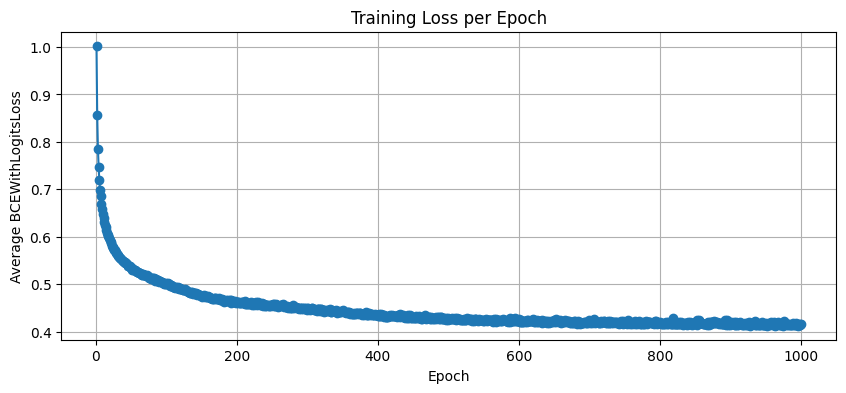

Model saved to binary_ae_gumbel_deep_weighted_notebook.pth

--- Plotting 4 Original vs. Reconstructed Graphs ---


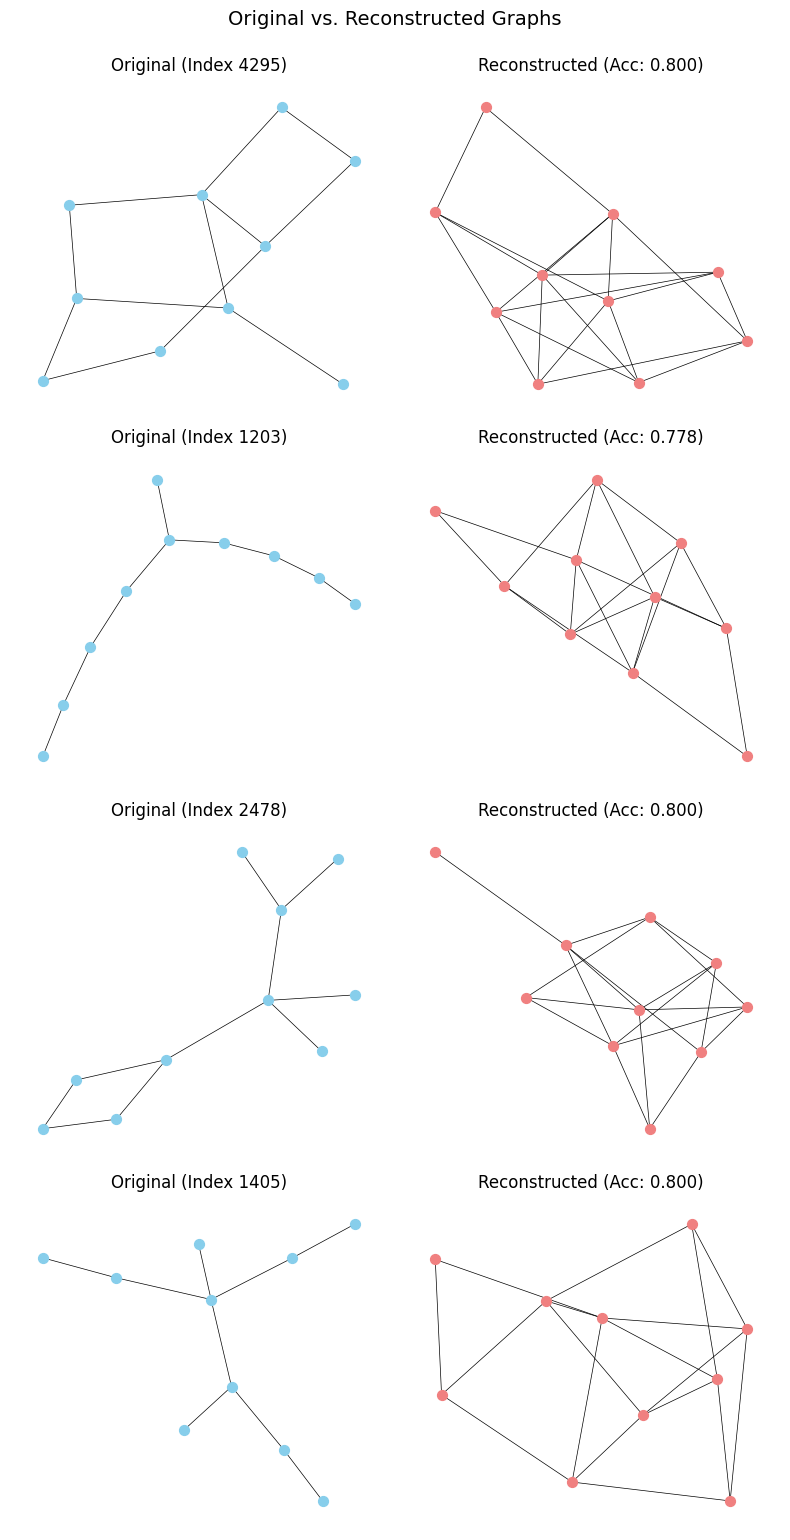


--- Plotting Reconstruction from Latent Code ---
Input Latent Code (first 50 bits): [0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1]...


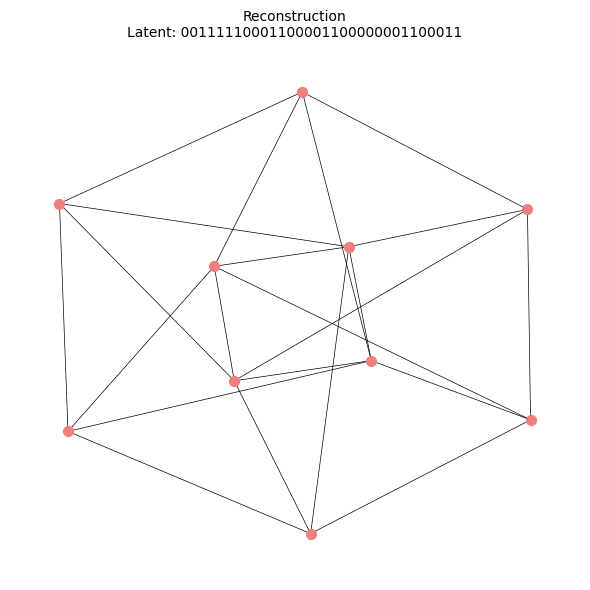


Notebook execution finished.


In [9]:
# ==============================================================================
#                           CONFIGURATION SETTINGS
# ==============================================================================

# --- Execution Mode ---
# Set only ONE of these to True
DO_TRAINING = True  # Set to True to train a new model
LOAD_WEIGHTS = False # Set to True to load weights (requires WEIGHTS_PATH_TO_LOAD)

# --- Paths ---
# Path to save weights AFTER training (if DO_TRAINING is True)
WEIGHTS_PATH_TO_SAVE = "binary_ae_gumbel_deep_weighted_notebook.pth"
# Path to load weights FROM (if LOAD_WEIGHTS is True)
WEIGHTS_PATH_TO_LOAD = "binary_ae_gumbel_deep_weighted_notebook.pth" # Or path to your existing weights

# --- Dataset Params ---
NUM_VERTICES = 10
EDGE_PROB = 0.25
DATASET_SIZE = 5000
RATIO_BIPARTITE = 1.0
ENSURE_CONNECTED = True
DATASET_SEED = 42

# --- Model Params ---
LATENT_DIM = 32
INTERMEDIATE_DIM1 = 128
INTERMEDIATE_DIM2 = 64
DROPOUT_RATE = 0.3

# --- Gumbel-Softmax Params ---
INITIAL_TEMPERATURE = 2.0
MIN_TEMPERATURE = 0.1

# --- Training Params (Used only if DO_TRAINING is True) ---
LEARNING_RATE = 3e-4
BATCH_SIZE = 128
EPOCHS = 1000 # Adjust as needed

# --- Plotting Params ---
# Plot reconstructions from the dataset after training? (Requires DO_TRAINING = True)
PLOT_DATASET_RECONSTRUCTIONS = True
NUM_RECONSTRUCTION_PLOTS = 4
# Plot reconstruction from a random latent code after training or loading?
PLOT_LATENT_RECONSTRUCTION = True

# ==============================================================================
# --- Deeper Model Definition with Dropout and Logits Output ---
# (Same as previous version)
class BinaryAutoencoderGumbelDeep(nn.Module):
    def __init__(
        self,
        input_dim,
        latent_dim,
        intermediate_dim1,
        intermediate_dim2,
        temperature, # Keep initial temp for reference if needed
        dropout_rate=0.3 # Added dropout rate parameter
    ):
        super().__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.intermediate_dim1 = intermediate_dim1
        self.intermediate_dim2 = intermediate_dim2
        self.dropout_rate = dropout_rate

        # Encoder layers
        self.enc_fc1 = nn.Linear(input_dim, intermediate_dim1)
        self.enc_bn1 = nn.BatchNorm1d(intermediate_dim1)
        self.enc_fc2 = nn.Linear(intermediate_dim1, intermediate_dim2)
        self.enc_bn2 = nn.BatchNorm1d(intermediate_dim2)
        self.enc_fc3_logits = nn.Linear(
            intermediate_dim2, latent_dim * 2
        )
        self.dropout_enc = nn.Dropout(self.dropout_rate) # Encoder dropout

        # Decoder layers
        self.dec_fc1 = nn.Linear(latent_dim, intermediate_dim2)
        self.dec_bn1 = nn.BatchNorm1d(intermediate_dim2)
        self.dec_fc2 = nn.Linear(intermediate_dim2, intermediate_dim1)
        self.dec_bn2 = nn.BatchNorm1d(intermediate_dim1)
        self.dec_fc3_output = nn.Linear(intermediate_dim1, input_dim)
        self.dropout_dec = nn.Dropout(self.dropout_rate) # Decoder dropout

    def encode(self, x, current_temp):
        x = F.relu(self.enc_bn1(self.enc_fc1(x)))
        x = self.dropout_enc(x) # Apply dropout
        x = F.relu(self.enc_bn2(self.enc_fc2(x)))
        x = self.dropout_enc(x) # Apply dropout
        logits = self.enc_fc3_logits(x)
        logits_reshaped = logits.view(-1, self.latent_dim, 2)
        z_one_hot = F.gumbel_softmax(
            logits_reshaped, tau=current_temp, hard=True, dim=-1
        )
        z_binary = z_one_hot[:, :, 1]
        return z_binary, logits_reshaped

    def decode(self, z):
        # Ensure input z is the correct dimension
        if z.shape[-1] != self.latent_dim:
             raise ValueError(f"Input latent code has dimension {z.shape[-1]}, expected {self.latent_dim}")
        x = F.relu(self.dec_bn1(self.dec_fc1(z)))
        x = self.dropout_dec(x) # Apply dropout
        x = F.relu(self.dec_bn2(self.dec_fc2(x)))
        x = self.dropout_dec(x) # Apply dropout
        # Output raw logits for BCEWithLogitsLoss
        reconstruction_logits = self.dec_fc3_output(x)
        return reconstruction_logits

    def forward(self, x, current_temp):
        z_binary, _ = self.encode(x, current_temp)
        # Decode returns logits now
        reconstruction_logits = self.decode(z_binary)
        return reconstruction_logits

    def update_temperature(self, current_step, total_steps, anneal_rate, min_temp, initial_temp):
        new_temp = np.maximum(
             initial_temp * np.exp(-anneal_rate * current_step),
             min_temp,
         )
        return new_temp

# --- Utility Functions ---

def load_model_weights(model, weights_path, device):
    """Loads weights from a .pth file into the model."""
    if not os.path.exists(weights_path):
        print(f"Error: Weights file not found at {weights_path}")
        return None
    print(f"Loading weights from {weights_path} onto {device}...")
    try:
        state_dict = torch.load(weights_path, map_location=device)
        model.load_state_dict(state_dict)
        model.to(device)
        model.eval()
        print("Weights loaded successfully.")
        return model
    except Exception as e:
        print(f"Error loading weights: {e}")
        return None

def plot_reconstruction_from_latent(model, latent_code, num_nodes, device):
    """Decodes a single latent code and plots the resulting graph."""
    model.eval()
    if isinstance(latent_code, np.ndarray):
        latent_code = torch.from_numpy(latent_code).float()
    if latent_code.ndim == 1: latent_code = latent_code.unsqueeze(0)
    elif latent_code.ndim != 2 or latent_code.shape[0] != 1:
         raise ValueError("Input latent_code must be a 1D tensor/array or a batch of size 1.")
    if latent_code.shape[1] != model.latent_dim:
        raise ValueError(f"Latent code dimension ({latent_code.shape[1]}) != model latent dim ({model.latent_dim}).")
    latent_code = latent_code.to(device)

    print("\n--- Plotting Reconstruction from Latent Code ---")
    print(f"Input Latent Code (first 50 bits): {latent_code.squeeze().cpu().numpy().astype(int)[:50]}...")

    with torch.no_grad():
        # Decode returns LOGITS
        reconstruction_logits = model.decode(latent_code)
        # Apply sigmoid HERE before rounding
        reconstruction_continuous = torch.sigmoid(reconstruction_logits)
        reconstruction_binary_vec = torch.round(reconstruction_continuous)

    try:
        reconstructed_adj = vec_to_adj(reconstruction_binary_vec.squeeze(0).cpu().numpy(), num_nodes)
    except ValueError as e:
        print(f"Error converting reconstructed vector to adjacency matrix: {e}"); return
    except NameError:
        print("Error: vec_to_adj function not defined. Make sure it's imported or defined.")
        return
    G_recon = nx.from_numpy_array(reconstructed_adj)

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    nx.draw(G_recon, ax=ax, with_labels=False, node_size=50, width=0.5, node_color='lightcoral')
    latent_str = "".join(map(str, latent_code.squeeze().cpu().numpy().astype(int)))
    max_display_len = 60
    latent_display = latent_str[:max_display_len] + "..." if len(latent_str) > max_display_len else latent_str
    ax.set_title(f"Reconstruction\nLatent: {latent_display}", fontsize=10)
    ax.axis('off'); plt.tight_layout(); plt.show()

def plot_reconstructions(model, data_tensor, num_nodes, num_plots, device, final_temp):
    """Plots original vs reconstructed graphs."""
    model.eval()
    num_available = len(data_tensor)
    if num_available == 0: print("No data available to plot."); return
    if num_plots > num_available: num_plots = num_available
    if num_plots <= 0: print("Number of plots must be positive."); return

    indices = np.random.choice(num_available, num_plots, replace=False)
    cols = 2; rows = num_plots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), squeeze=False)

    print(f"\n--- Plotting {num_plots} Original vs. Reconstructed Graphs ---")
    with torch.no_grad():
        for i, idx in enumerate(indices):
            original_vec = data_tensor[idx].unsqueeze(0).to(device)
            # Forward pass returns LOGITS
            reconstruction_logits = model(original_vec, final_temp)
            # Apply sigmoid HERE before rounding
            reconstruction_continuous = torch.sigmoid(reconstruction_logits)
            reconstruction_binary_vec = torch.round(reconstruction_continuous)

            try:
                original_adj = vec_to_adj(original_vec.squeeze(0).cpu().numpy(), num_nodes)
                reconstructed_adj = vec_to_adj(reconstruction_binary_vec.squeeze(0).cpu().numpy(), num_nodes)
            except ValueError as e:
                print(f"Skipping plot for index {idx} due to error: {e}"); continue
            except NameError:
                 print("Error: vec_to_adj function not defined. Make sure it's imported or defined.")
                 return # Stop plotting if util is missing

            G_orig = nx.from_numpy_array(original_adj)
            G_recon = nx.from_numpy_array(reconstructed_adj)
            correct_bits = (original_vec.round() == reconstruction_binary_vec).sum().item() # Compare rounded original just in case
            total_bits = original_vec.numel()
            accuracy = correct_bits / total_bits if total_bits > 0 else 0

            ax_orig = axes[i, 0]
            nx.draw(G_orig, ax=ax_orig, with_labels=False, node_size=50, width=0.5, node_color='skyblue')
            ax_orig.set_title(f"Original (Index {idx})")
            ax_orig.axis('off')

            ax_recon = axes[i, 1]
            nx.draw(G_recon, ax=ax_recon, with_labels=False, node_size=50, width=0.5, node_color='lightcoral')
            ax_recon.set_title(f"Reconstructed (Acc: {accuracy:.3f})") # Accuracy still bitwise
            ax_recon.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.suptitle("Original vs. Reconstructed Graphs", fontsize=14, y=0.99)
    plt.show()

# ==============================================================================
#                               MAIN EXECUTION
# ==============================================================================

# --- Device Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Determine Input Dimension ---
input_dim = NUM_VERTICES * (NUM_VERTICES - 1) // 2
print(f"Using {NUM_VERTICES} vertices, expected input dimension: {input_dim}")

# --- Model Initialization ---
model = BinaryAutoencoderGumbelDeep(
    input_dim=input_dim,
    latent_dim=LATENT_DIM,
    intermediate_dim1=INTERMEDIATE_DIM1,
    intermediate_dim2=INTERMEDIATE_DIM2,
    temperature=INITIAL_TEMPERATURE,
    dropout_rate=DROPOUT_RATE
).to(device)

print("\nModel Architecture:")
print(model)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {num_params:,}")

# --- Global variables ---
all_vectors_tensor = None
final_temp = MIN_TEMPERATURE # Default if not training

# --- Mode Selection: Train or Load ---
if DO_TRAINING:
    print("\n--- Mode: Training ---")
    # --- Dataset Generation ---
    print("Generating dataset...")
    try:
        dataset = BipartiteGraphDataset(
            num_samples=DATASET_SIZE,
            num_vertices=NUM_VERTICES,
            edge_prob=EDGE_PROB,
            ratio_bipartite=RATIO_BIPARTITE,
            ensure_connected=ENSURE_CONNECTED,
            seed=DATASET_SEED,
        )
    except NameError:
        print("Error: BipartiteGraphDataset not defined. Cannot generate data.")
        dataset = None # Indicate failure

    if dataset is None or len(dataset) == 0:
        print("Dataset generation failed or dataset empty. Exiting training.")
    else:
        if dataset.vector_size != input_dim:
             print(f"Warning: Dataset vector size ({dataset.vector_size}) differs from expected ({input_dim}).")

        # --- Prepare Data ---
        all_vectors, _ = dataset.get_all_data()
        all_vectors_tensor = torch.from_numpy(all_vectors).float()
        train_dataset = TensorDataset(all_vectors_tensor)
        # Use num_workers=0 in notebooks if multiprocessing causes issues
        train_loader = DataLoader(
            train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0
        )

        # --- Calculate pos_weight for Weighted BCE ---
        pos_weight_tensor = torch.tensor([1.0], device=device) # Default
        if len(all_vectors_tensor) > 0:
            num_zeros = (all_vectors_tensor == 0).sum().item()
            num_ones = (all_vectors_tensor == 1).sum().item()
            if num_ones > 0:
                pos_weight_value = num_zeros / num_ones
                print(f"Calculated pos_weight for BCE: {pos_weight_value:.2f}")
                pos_weight_tensor = torch.tensor([pos_weight_value], device=device)
            else: print("Warning: No positive samples (edges) found. Using default weight 1.0.")
        else: print("Warning: Dataset empty. Using default weight 1.0.")

        # --- Optimizer and Loss (Using Weighted BCE) ---
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor) # Use weighted loss
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

        # --- Calculate Annealing Rate ---
        steps_per_epoch = len(train_loader)
        total_training_steps = EPOCHS * steps_per_epoch
        anneal_steps = int(total_training_steps * 0.8)
        anneal_rate = -np.log(MIN_TEMPERATURE / INITIAL_TEMPERATURE) / anneal_steps if anneal_steps > 0 else 0
        print(f"Total training steps: {total_training_steps}")
        print(f"Gumbel temperature annealing rate: {anneal_rate:.6f} (over {anneal_steps} steps)")

        # --- Training Loop ---
        print("\nStarting Training...")
        current_temp = INITIAL_TEMPERATURE
        global_step = 0
        training_losses = [] # Store average epoch losses

        for epoch in range(EPOCHS):
            model.train()
            epoch_loss = 0.0
            # Use tqdm.notebook here
            progress_bar = tqdm(
                train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False, unit="batch"
            )
            for data in progress_bar:
                batch_x = data[0].to(device)
                optimizer.zero_grad()
                current_temp = model.update_temperature(
                     global_step, total_training_steps, anneal_rate, MIN_TEMPERATURE, INITIAL_TEMPERATURE
                )
                # Forward pass returns LOGITS
                reconstruction_logits = model(batch_x, current_temp)
                # Calculate loss using logits
                loss = criterion(reconstruction_logits, batch_x)
                loss.backward()
                optimizer.step()
                batch_loss = loss.item()
                epoch_loss += batch_loss
                global_step += 1
                progress_bar.set_postfix(loss=f"{batch_loss:.4f}", temp=f"{current_temp:.4f}")

            avg_epoch_loss = epoch_loss / len(train_loader)
            training_losses.append(avg_epoch_loss)
            # Use print instead of just updating tqdm description after epoch
            print(f"Epoch [{epoch+1}/{EPOCHS}] Average Loss: {avg_epoch_loss:.4f}")

        final_temp = current_temp
        print("\nTraining Finished.")

        # --- Plot Training Loss ---
        plt.figure(figsize=(10, 4))
        plt.plot(range(1, EPOCHS + 1), training_losses, marker='o', linestyle='-')
        plt.title("Training Loss per Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Average BCEWithLogitsLoss")
        plt.grid(True)
        plt.show()


        # --- Save Model ---
        try:
            torch.save(model.state_dict(), WEIGHTS_PATH_TO_SAVE)
            print(f"Model saved to {WEIGHTS_PATH_TO_SAVE}")
        except Exception as e: print(f"Error saving model: {e}")

elif LOAD_WEIGHTS:
    print("\n--- Mode: Loading Weights ---")
    model = load_model_weights(model, WEIGHTS_PATH_TO_LOAD, device)
    if model is None:
        print("Failed to load model. Cannot proceed with plotting.")
        # Set model to None to prevent plotting errors
        model = None
    final_temp = MIN_TEMPERATURE # Use min temp for inference when loading

else:
    print("No action specified. Set DO_TRAINING or LOAD_WEIGHTS to True.")
    model = None # Ensure model is None if no action taken

# --- Plotting Actions ---
if model is not None: # Proceed only if model exists (trained or loaded)
    if PLOT_DATASET_RECONSTRUCTIONS:
        if all_vectors_tensor is not None: # Check if data is available (only after training)
            plot_reconstructions(
                model=model, data_tensor=all_vectors_tensor, num_nodes=NUM_VERTICES,
                num_plots=NUM_RECONSTRUCTION_PLOTS, device=device, final_temp=final_temp
            )
        elif DO_TRAINING: # If training failed but plotting was requested
             print("Cannot plot dataset reconstructions: Training dataset generation/loading failed.")
        else: # If loading weights
            print("Cannot plot dataset reconstructions: Dataset not loaded (run with DO_TRAINING=True).")

    if PLOT_LATENT_RECONSTRUCTION:
        random_latent = torch.randint(0, 2, (1, LATENT_DIM), dtype=torch.float32)
        plot_reconstruction_from_latent(
            model=model, latent_code=random_latent, num_nodes=NUM_VERTICES, device=device
        )

print("\nNotebook execution finished.")

Using device: cpu
Generating dataset...

Bipartite Dataset (k=14, p=0.25, connected=True):
Target samples: 5000, Generated samples: 5000
Bipartite: 5000, Non-Bipartite: 0
Target Ratio (Bipartite): 1.000, Actual Ratio: 1.000
Input vector dimension: 91

Model Architecture:
BinaryAutoencoderGumbelDeep(
  (enc_fc1): Linear(in_features=91, out_features=128, bias=True)
  (enc_bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_fc2): Linear(in_features=128, out_features=64, bias=True)
  (enc_bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (enc_fc3_logits): Linear(in_features=64, out_features=42, bias=True)
  (dec_fc1): Linear(in_features=21, out_features=64, bias=True)
  (dec_bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dec_fc2): Linear(in_features=64, out_features=128, bias=True)
  (dec_bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

Epoch [1/100] Average Loss: 0.6326


Epoch [2/100] Average Loss: 0.5175


Epoch [3/100] Average Loss: 0.4519


Epoch [4/100] Average Loss: 0.4118


Epoch [5/100] Average Loss: 0.3861


Epoch [6/100] Average Loss: 0.3686


Epoch [7/100] Average Loss: 0.3555


Epoch [8/100] Average Loss: 0.3461


Epoch [9/100] Average Loss: 0.3384


Epoch [10/100] Average Loss: 0.3321


Epoch [11/100] Average Loss: 0.3279


Epoch [12/100] Average Loss: 0.3231


Epoch [13/100] Average Loss: 0.3203


Epoch [14/100] Average Loss: 0.3172


Epoch [15/100] Average Loss: 0.3139


Epoch [16/100] Average Loss: 0.3109


Epoch [17/100] Average Loss: 0.3095


Epoch [18/100] Average Loss: 0.3071


Epoch [19/100] Average Loss: 0.3055


Epoch [20/100] Average Loss: 0.3041


Epoch [21/100] Average Loss: 0.3023


Epoch [22/100] Average Loss: 0.3006


Epoch [23/100] Average Loss: 0.2992


Epoch [24/100] Average Loss: 0.2983


Epoch [25/100] Average Loss: 0.2966


Epoch [26/100] Average Loss: 0.2960


Epoch [27/100] Average Loss: 0.2945


Epoch [28/100] Average Loss: 0.2934


Epoch [29/100] Average Loss: 0.2929


Epoch [30/100] Average Loss: 0.2917


Epoch [31/100] Average Loss: 0.2909


Epoch [32/100] Average Loss: 0.2905


Epoch [33/100] Average Loss: 0.2900


Epoch [34/100] Average Loss: 0.2893


Epoch [35/100] Average Loss: 0.2880


Epoch [36/100] Average Loss: 0.2877


Epoch [37/100] Average Loss: 0.2870


Epoch [38/100] Average Loss: 0.2870


Epoch [39/100] Average Loss: 0.2860


Epoch [40/100] Average Loss: 0.2851


Epoch [41/100] Average Loss: 0.2849


Epoch [42/100] Average Loss: 0.2843


Epoch [43/100] Average Loss: 0.2832


Epoch [44/100] Average Loss: 0.2830


Epoch [45/100] Average Loss: 0.2823


Epoch [46/100] Average Loss: 0.2821


Epoch [47/100] Average Loss: 0.2819


Epoch [48/100] Average Loss: 0.2815


Epoch [49/100] Average Loss: 0.2806


Epoch [50/100] Average Loss: 0.2803


Epoch [51/100] Average Loss: 0.2795


Epoch [52/100] Average Loss: 0.2794


Epoch [53/100] Average Loss: 0.2786


Epoch [54/100] Average Loss: 0.2790


Epoch [55/100] Average Loss: 0.2782


Epoch [56/100] Average Loss: 0.2785


Epoch [57/100] Average Loss: 0.2780


Epoch [58/100] Average Loss: 0.2773


Epoch [59/100] Average Loss: 0.2769


Epoch [60/100] Average Loss: 0.2763


Epoch [61/100] Average Loss: 0.2761


Epoch [62/100] Average Loss: 0.2756


Epoch [63/100] Average Loss: 0.2759


Epoch [64/100] Average Loss: 0.2752


Epoch [65/100] Average Loss: 0.2763


Epoch [66/100] Average Loss: 0.2751


Epoch [67/100] Average Loss: 0.2744


Epoch [68/100] Average Loss: 0.2744


Epoch [69/100] Average Loss: 0.2744


Epoch [70/100] Average Loss: 0.2741


Epoch [71/100] Average Loss: 0.2735


Epoch [72/100] Average Loss: 0.2731


Epoch [73/100] Average Loss: 0.2733


Epoch [74/100] Average Loss: 0.2723


Epoch [75/100] Average Loss: 0.2724


Epoch [76/100] Average Loss: 0.2713


Epoch [77/100] Average Loss: 0.2720


Epoch [78/100] Average Loss: 0.2719


Epoch [79/100] Average Loss: 0.2717


Epoch [80/100] Average Loss: 0.2707


Epoch [81/100] Average Loss: 0.2708


Epoch [82/100] Average Loss: 0.2703


Epoch [83/100] Average Loss: 0.2708


Epoch [84/100] Average Loss: 0.2707


Epoch [85/100] Average Loss: 0.2700


Epoch [86/100] Average Loss: 0.2697


Epoch [87/100] Average Loss: 0.2697


Epoch [88/100] Average Loss: 0.2691


Epoch [89/100] Average Loss: 0.2687


Epoch [90/100] Average Loss: 0.2689


Epoch [91/100] Average Loss: 0.2687


Epoch [92/100] Average Loss: 0.2685


Epoch [93/100] Average Loss: 0.2683


Epoch [94/100] Average Loss: 0.2681


Epoch [95/100] Average Loss: 0.2679


Epoch [96/100] Average Loss: 0.2680


Epoch [97/100] Average Loss: 0.2678


Epoch [98/100] Average Loss: 0.2674


Epoch [99/100] Average Loss: 0.2672


Epoch [100/100] Average Loss: 0.2667

Training Finished.
Model saved to binary_ae_gumbel_deep.pth

--- Plotting 4 Original vs. Reconstructed Graphs ---


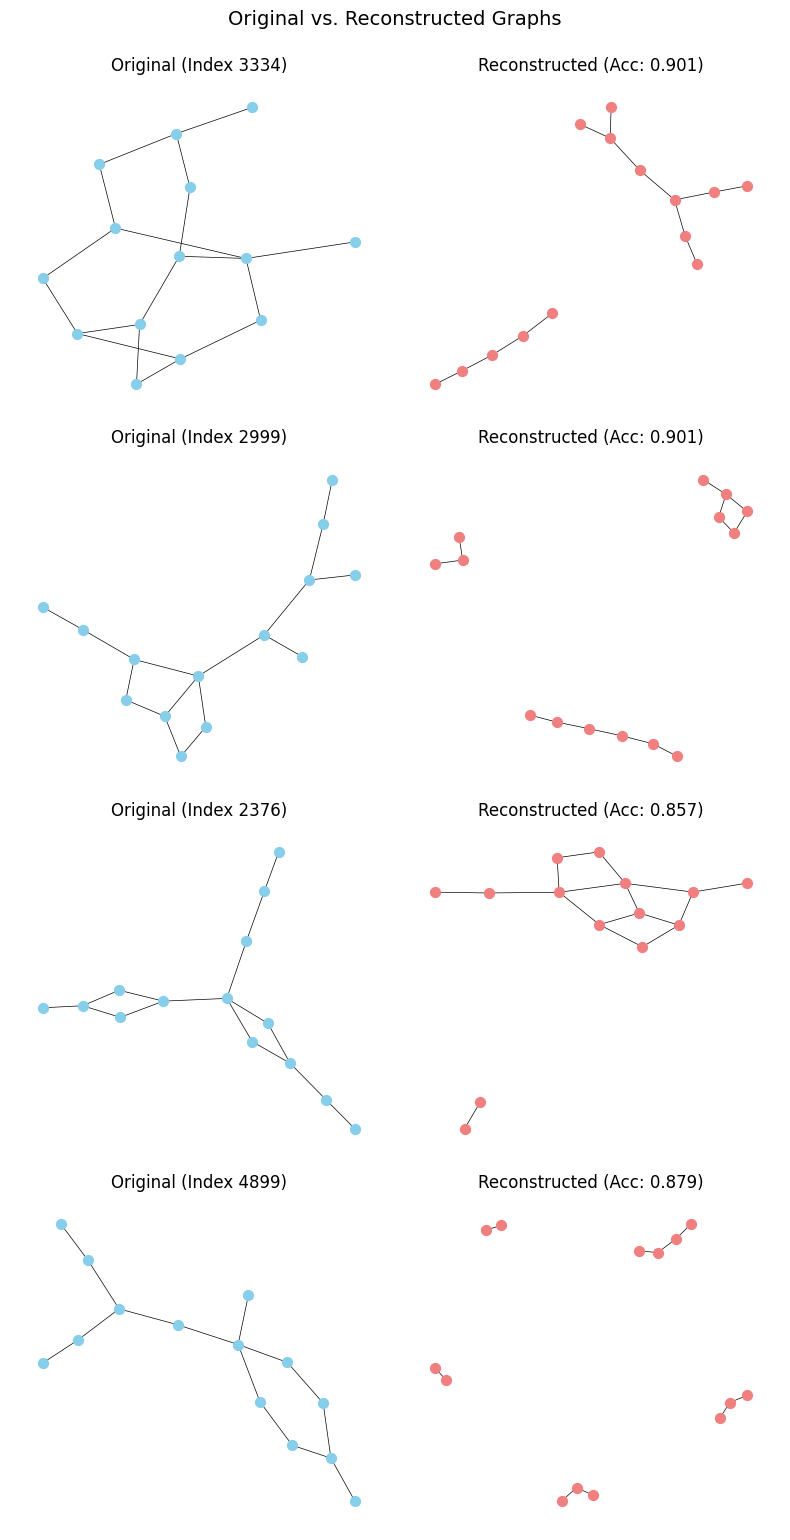

In [10]:
# train_autoencoder.py
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import argparse
import os
from tqdm import tqdm # Import tqdm
import matplotlib.pyplot as plt # Import plotting libraries
import networkx as nx
from datasets.utils import vec_to_adj



# --- Configuration ---
# Dataset Params
NUM_VERTICES = 14
EDGE_PROB = 0.25
DATASET_SIZE = 5000
RATIO_BIPARTITE = 1.0
ENSURE_CONNECTED = True
DATASET_SEED = 42

# Model Params
LATENT_DIM = 21
INTERMEDIATE_DIM1 = 128
INTERMEDIATE_DIM2 = 64

# Gumbel-Softmax Params
INITIAL_TEMPERATURE = 2.0
MIN_TEMPERATURE = 0.1

# Training Params
LEARNING_RATE = 3e-4
BATCH_SIZE = 128
EPOCHS = 100
MODEL_SAVE_PATH = "binary_ae_gumbel_deep.pth"

# Plotting Params
NUM_RECONSTRUCTION_PLOTS = 4 # Number of sample pairs to plot

# --- Deeper Model Definition (Includes BatchNorm) ---
class BinaryAutoencoderGumbelDeep(nn.Module):
    def __init__(
        self,
        input_dim,
        latent_dim,
        intermediate_dim1,
        intermediate_dim2,
        temperature,
    ):
        super().__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.temperature = temperature

        # Encoder layers
        self.enc_fc1 = nn.Linear(input_dim, intermediate_dim1)
        self.enc_bn1 = nn.BatchNorm1d(intermediate_dim1)
        self.enc_fc2 = nn.Linear(intermediate_dim1, intermediate_dim2)
        self.enc_bn2 = nn.BatchNorm1d(intermediate_dim2)
        self.enc_fc3_logits = nn.Linear(
            intermediate_dim2, latent_dim * 2
        )

        # Decoder layers
        self.dec_fc1 = nn.Linear(latent_dim, intermediate_dim2)
        self.dec_bn1 = nn.BatchNorm1d(intermediate_dim2)
        self.dec_fc2 = nn.Linear(intermediate_dim2, intermediate_dim1)
        self.dec_bn2 = nn.BatchNorm1d(intermediate_dim1)
        self.dec_fc3_output = nn.Linear(intermediate_dim1, input_dim)

    def encode(self, x, current_temp):
        x = F.relu(self.enc_bn1(self.enc_fc1(x)))
        x = F.relu(self.enc_bn2(self.enc_fc2(x)))
        logits = self.enc_fc3_logits(x)
        logits_reshaped = logits.view(-1, self.latent_dim, 2)
        z_one_hot = F.gumbel_softmax(
            logits_reshaped, tau=current_temp, hard=True, dim=-1
        )
        z_binary = z_one_hot[:, :, 1]
        return z_binary, logits_reshaped

    def decode(self, z):
        x = F.relu(self.dec_bn1(self.dec_fc1(z)))
        x = F.relu(self.dec_bn2(self.dec_fc2(x)))
        reconstruction = torch.sigmoid(self.dec_fc3_output(x))
        return reconstruction

    def forward(self, x, current_temp):
        z_binary, _ = self.encode(x, current_temp)
        reconstruction = self.decode(z_binary)
        return reconstruction

    def update_temperature(self, current_step, total_steps, anneal_rate, min_temp, initial_temp):
        new_temp = np.maximum(
             initial_temp * np.exp(-anneal_rate * current_step),
             min_temp,
         )
        return new_temp


# --- Plotting Function ---
def plot_reconstructions(model, data_tensor, num_nodes, num_plots, device, final_temp):
    """Plots original vs reconstructed graphs."""
    model.eval()
    num_available = len(data_tensor)
    if num_available == 0:
        print("No data available to plot.")
        return
    if num_plots > num_available:
        print(f"Warning: Requested {num_plots} plots, but only {num_available} samples available. Plotting all.")
        num_plots = num_available
    if num_plots <= 0:
        print("Number of plots must be positive.")
        return

    # Select random indices
    indices = np.random.choice(num_available, num_plots, replace=False)

    fig, axes = plt.subplots(num_plots, 2, figsize=(8, num_plots * 4))
    # Ensure axes is always 2D, even if num_plots is 1
    if num_plots == 1:
        axes = axes.reshape(1, 2)

    print(f"\n--- Plotting {num_plots} Original vs. Reconstructed Graphs ---")

    with torch.no_grad():
        for i, idx in enumerate(indices):
            original_vec = data_tensor[idx].unsqueeze(0).to(device) # Add batch dim

            # Get reconstruction
            reconstruction_continuous = model(original_vec, final_temp)
            reconstruction_binary_vec = torch.round(reconstruction_continuous)

            # Convert vectors to adjacency matrices (move to CPU and NumPy)
            original_adj = vec_to_adj(original_vec.squeeze(0).cpu().numpy(), num_nodes)
            reconstructed_adj = vec_to_adj(reconstruction_binary_vec.squeeze(0).cpu().numpy(), num_nodes)

            # Create NetworkX graphs
            G_orig = nx.from_numpy_array(original_adj)
            G_recon = nx.from_numpy_array(reconstructed_adj)

            # Calculate reconstruction accuracy for this sample
            correct_bits = (original_vec == reconstruction_binary_vec).sum().item()
            total_bits = original_vec.numel()
            accuracy = correct_bits / total_bits if total_bits > 0 else 0

            # Plot Original
            ax_orig = axes[i, 0]
            nx.draw(
                G_orig, ax=ax_orig, with_labels=False, node_size=50, width=0.5,
                node_color='skyblue'
            )
            ax_orig.set_title(f"Original (Index {idx})")
            ax_orig.axis('off')

            # Plot Reconstructed
            ax_recon = axes[i, 1]
            nx.draw(
                G_recon, ax=ax_recon, with_labels=False, node_size=50, width=0.5,
                node_color='lightcoral'
            )
            ax_recon.set_title(f"Reconstructed (Acc: {accuracy:.3f})")
            ax_recon.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for main title
    plt.suptitle("Original vs. Reconstructed Graphs", fontsize=14, y=0.99)
    plt.show()


def main():
    # --- Device Setup ---
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Dataset Generation ---
    print("Generating dataset...")
    dataset = BipartiteGraphDataset(
        num_samples=DATASET_SIZE,
        num_vertices=NUM_VERTICES,
        edge_prob=EDGE_PROB,
        ratio_bipartite=RATIO_BIPARTITE,
        ensure_connected=ENSURE_CONNECTED,
        seed=DATASET_SEED,
    )

    if len(dataset) == 0:
        print("Dataset generation failed. Exiting.")
        return

    # --- Prepare Data for PyTorch ---
    all_vectors, _ = dataset.get_all_data()
    all_vectors_tensor = torch.from_numpy(all_vectors).float()
    train_dataset = TensorDataset(all_vectors_tensor)
    train_loader = DataLoader(
        train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2
    )

    # --- Model, Loss, Optimizer ---
    input_dim = dataset.vector_size
    print(f"Input vector dimension: {input_dim}")
    if input_dim != 91 and NUM_VERTICES == 14:
         print(f"Warning: Generated vector size ({input_dim}) should be 91 for {NUM_VERTICES} vertices.")
    elif NUM_VERTICES != 14:
         print(f"Note: Input dimension is {input_dim} because NUM_VERTICES is {NUM_VERTICES} (not 14).")


    model = BinaryAutoencoderGumbelDeep(
        input_dim=input_dim,
        latent_dim=LATENT_DIM,
        intermediate_dim1=INTERMEDIATE_DIM1,
        intermediate_dim2=INTERMEDIATE_DIM2,
        temperature=INITIAL_TEMPERATURE,
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    print("\nModel Architecture:")
    print(model)
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total trainable parameters: {num_params:,}")

    # --- Calculate Annealing Rate ---
    steps_per_epoch = len(train_loader)
    total_training_steps = EPOCHS * steps_per_epoch
    anneal_steps = int(total_training_steps * 0.8)
    if anneal_steps > 0:
        anneal_rate = -np.log(MIN_TEMPERATURE / INITIAL_TEMPERATURE) / anneal_steps
    else:
        anneal_rate = 0
    print(f"Total training steps: {total_training_steps}")
    print(f"Gumbel temperature annealing rate: {anneal_rate:.6f} (over {anneal_steps} steps)")

    # --- Training Loop ---
    print("\nStarting Training...")
    current_temp = INITIAL_TEMPERATURE
    global_step = 0

    for epoch in range(EPOCHS):
        model.train()
        epoch_loss = 0.0
        # Wrap train_loader with tqdm for a progress bar
        progress_bar = tqdm(
            train_loader,
            desc=f"Epoch {epoch+1}/{EPOCHS}",
            leave=False, # Don't leave finished bars
            unit="batch"
        )

        for data in progress_bar:
            batch_x = data[0].to(device)
            optimizer.zero_grad()

            # Update temperature
            current_temp = model.update_temperature(
                 global_step, total_training_steps, anneal_rate, MIN_TEMPERATURE, INITIAL_TEMPERATURE
            )

            # Forward pass
            reconstructions = model(batch_x, current_temp)

            # Calculate loss
            loss = criterion(reconstructions, batch_x)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            batch_loss = loss.item()
            epoch_loss += batch_loss
            global_step += 1

            # Update tqdm postfix with current loss and temperature
            progress_bar.set_postfix(loss=f"{batch_loss:.4f}", temp=f"{current_temp:.4f}")

        avg_epoch_loss = epoch_loss / len(train_loader)
        # Print average loss after the tqdm bar finishes for the epoch
        print(f"Epoch [{epoch+1}/{EPOCHS}] Average Loss: {avg_epoch_loss:.4f}")

    print("\nTraining Finished.")

    # --- Save Model ---
    try:
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"Model saved to {MODEL_SAVE_PATH}")
    except Exception as e:
        print(f"Error saving model: {e}")

    # --- Plot Reconstructions ---
    plot_reconstructions(
        model=model,
        data_tensor=all_vectors_tensor,
        num_nodes=NUM_VERTICES,
        num_plots=NUM_RECONSTRUCTION_PLOTS,
        device=device,
        final_temp=current_temp # Use the final temperature from training
    )

if __name__ == "__main__":
    main()
